# EDA and Visualization of House Price Growth in the UK by Cities

The data set has been cleaned and is available as file capstone1_clean.csv. This contains data for 63  major cities and towns in the UK published by :
- annual average house prices 
- annual population
- annual average wages
- unemployment data

The purpose of the exercise is to examine the movements in house prices over the period 2003/4 to 2015/6, for which the data is available. Some of the questions that the exercise will try to answer are:
- how did house prices change over the given period?
- what is the variation in prices between cities? 
- which demographic or economic factors influence house prices (for which factors is there a statistically significant correlation)?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import scipy.stats

# Import data

In [3]:
df1 = pd.read_csv('data\capstone1_clean.csv')

In [4]:
df1.head()

,City,Average Weekly Workplace Earnings 2004 (£),Average Weekly Workplace Earnings 2005 (£),Average Weekly Workplace Earnings 2006 (£),Average Weekly Workplace Earnings 2007 (£),Average Weekly Workplace Earnings 2008 (£),Average Weekly Workplace Earnings 2009 (£),Average Weekly Workplace Earnings 2010 (£),Average Weekly Workplace Earnings 2011 (£),Average Weekly Workplace Earnings 2012 (£),...,Youth Claimant Count Aug 2016 (%),Youth Claimant Count Sep 2016 (%),Youth Claimant Count Oct 2016 (%),Youth Claimant Count Nov 2016 (%),Youth Claimant Count Dec 2016 (%),Youth Claimant Count Jan 2017 (%),Youth Claimant Count Feb 2017 (%),Youth Claimant Count Mar 2017 (%),Youth Claimant Count Apr 2017 (%),Youth Claimant Count May 2017 (%)
0,Aberdeen,588.758170,594.615385,612.781955,598.288509,624.704492,632.870370,629.451288,608.788853,574.7,...,1.87,1.80,1.72,1.69,1.56,1.57,1.77,1.92,1.87,1.87
1,Aldershot,710.333677,675.395560,708.987987,711.109602,708.780032,734.156977,633.790239,659.812059,600.9,...,0.90,1.00,0.98,0.87,0.87,0.81,0.92,0.90,0.92,0.87
2,Barnsley,484.967320,483.333333,473.809524,485.330073,483.687943,487.384259,473.796193,453.697749,426.2,...,3.31,3.39,3.25,3.09,2.89,2.91,3.15,3.17,3.21,3.13
3,Basildon,601.960784,600.128205,585.463659,590.709046,590.661939,570.601852,523.740202,538.370847,474.3,...,2.72,2.67,2.75,2.62,2.64,2.62,2.67,2.75,2.83,2.62
4,Belfast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.00,4.04,3.88,3.75,3.44,3.51,3.65,3.64,3.48,3.31


In [5]:
df1.shape

(63, 400)

In [6]:
# drop Belfast row as price data missing
df2 = df1.drop(4, axis=0)
df2 = df2.set_index('City')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, Aberdeen to York
Columns: 399 entries, Average Weekly Workplace Earnings 2004  (£) to Youth Claimant Count May 2017  (%)
dtypes: float64(399)
memory usage: 193.8+ KB


Extract house prices from the data set

In [7]:
houseprices = df2[df2.columns[200:214]]
houseprices.head()

,Mean house price 2003 (£),Mean house price 2004 (£),Mean house price 2005 (£),Mean house price 2006 (£),Mean house price 2007 (£),Mean house price 2008 (£),Mean house price 2009 (£),Mean house price 2010 (£),Mean house price 2011 (£),Mean house price 2012 (£),Mean house price 2013 (£),Mean house price 2014 (£),Mean house price 2015 (£),Mean house price 2016 (£)
City,,,,,,,,,,,,,,
Aberdeen,90551.27567,100759.6896,113275.7769,132862.0914,172278.6259,173131.7494,169156.8676,181312.5055,185500.8876,188111.0411,198746.7409,213683.6765,220795.7395,202731.816592
Aldershot,218258.28750,228235.4535,231289.8085,241057.7736,271637.5992,260492.1135,247263.2810,273165.7983,272992.9683,277760.7478,285403.5038,302733.5712,328570.4755,360379.764064
Barnsley,79156.91686,102751.8894,112839.8151,120454.1528,129507.3882,127870.7255,118220.6498,121102.2502,117001.2571,118651.9165,117620.4456,126870.8695,123452.0000,123857.227670
Basildon,162282.35250,178237.5256,188064.3866,197392.2405,212732.7405,211944.0278,206462.8052,225114.9079,219052.7751,220320.3236,226471.5331,243726.3460,261856.0000,301386.174922
Birkenhead,104344.84880,132319.0280,141993.4710,154980.0550,160940.4484,161405.1566,158619.3503,162143.8566,163304.3752,159933.1423,160376.9457,167115.7523,166295.0000,169991.128225


In [8]:
houseprices.columns = houseprices.columns.str.extract('([0-9]+)')
houseprices.head()

C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,,,,
Aberdeen,90551.27567,100759.6896,113275.7769,132862.0914,172278.6259,173131.7494,169156.8676,181312.5055,185500.8876,188111.0411,198746.7409,213683.6765,220795.7395,202731.816592
Aldershot,218258.28750,228235.4535,231289.8085,241057.7736,271637.5992,260492.1135,247263.2810,273165.7983,272992.9683,277760.7478,285403.5038,302733.5712,328570.4755,360379.764064
Barnsley,79156.91686,102751.8894,112839.8151,120454.1528,129507.3882,127870.7255,118220.6498,121102.2502,117001.2571,118651.9165,117620.4456,126870.8695,123452.0000,123857.227670
Basildon,162282.35250,178237.5256,188064.3866,197392.2405,212732.7405,211944.0278,206462.8052,225114.9079,219052.7751,220320.3236,226471.5331,243726.3460,261856.0000,301386.174922
Birkenhead,104344.84880,132319.0280,141993.4710,154980.0550,160940.4484,161405.1566,158619.3503,162143.8566,163304.3752,159933.1423,160376.9457,167115.7523,166295.0000,169991.128225


In [9]:
houseprices['Ratio 2016 to 2003'] = houseprices['2016'] / houseprices['2003']  
houseprices['Ratio 2015 to 2003'] = houseprices['2015'] / houseprices['2003']  
houseprices

C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Ratio 2016 to 2003,Ratio 2015 to 2003
City,,,,,,,,,,,,,,,,
Aberdeen,90551.27567,100759.68960,113275.77690,132862.09140,172278.6259,173131.74940,169156.8676,181312.50550,185500.88760,188111.04110,198746.74090,213683.6765,220795.73950,202731.816592,2.238862,2.438350
Aldershot,218258.28750,228235.45350,231289.80850,241057.77360,271637.5992,260492.11350,247263.2810,273165.79830,272992.96830,277760.74780,285403.50380,302733.5712,328570.47550,360379.764064,1.651162,1.505420
Barnsley,79156.91686,102751.88940,112839.81510,120454.15280,129507.3882,127870.72550,118220.6498,121102.25020,117001.25710,118651.91650,117620.44560,126870.8695,123452.00000,123857.227670,1.564705,1.559586
Basildon,162282.35250,178237.52560,188064.38660,197392.24050,212732.7405,211944.02780,206462.8052,225114.90790,219052.77510,220320.32360,226471.53310,243726.3460,261856.00000,301386.174922,1.857172,1.613583
Birkenhead,104344.84880,132319.02800,141993.47100,154980.05500,160940.4484,161405.15660,158619.3503,162143.85660,163304.37520,159933.14230,160376.94570,167115.7523,166295.00000,169991.128225,1.629128,1.593706
Birmingham,122634.78750,140370.05420,146171.13290,155377.48360,161429.4559,155656.50260,151345.8073,160349.47630,154125.25590,155584.23610,161610.60400,169422.5889,174029.00000,177602.563936,1.448223,1.419083
Blackburn,67973.53108,84997.31396,96858.13686,107958.70030,118638.9298,115128.60240,113340.7204,113730.95640,111355.03250,114135.29730,112291.54590,118449.8859,118872.43090,118717.232714,1.746521,1.748805
Blackpool,97946.29302,124487.20400,135196.72140,147323.39760,153804.3572,152599.37410,146205.1327,151108.45570,140848.63360,137693.57150,140765.66680,148028.5202,147795.10440,146394.338891,1.494639,1.508940
Bournemouth,197133.26340,218477.67650,224776.14970,239136.94370,259467.2610,255697.81650,238888.2591,259090.69280,257480.37740,259834.12870,261736.96020,279850.7279,296454.79480,309274.980637,1.568862,1.503829


# Change in prices from 2003 to 2016

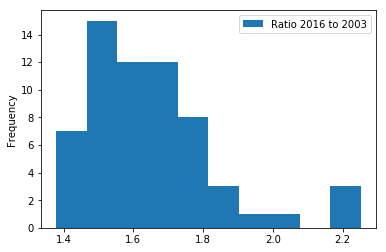

In [10]:
houseprices.plot(kind = 'hist', y='Ratio 2016 to 2003')
plt.show()

In [11]:
houseprices['Ratio 2016 to 2003'].describe()

count    62.000000
mean      1.650260
std       0.189578
min       1.378782
25%       1.521207
50%       1.612781
75%       1.730193
max       2.251657
Name: Ratio 2016 to 2003, dtype: float64

In [12]:
df3 = houseprices.iloc[:,0:14]
mean_by_city, std_by_city = df3.mean(axis=1), df3.std(axis=1)



In [13]:
mean_by_city.sort_values(ascending=False)

City
London           390284.518783
Oxford           343934.878338
Cambridge        323043.766516
Reading          275459.239127
Aldershot        271374.367555
Brighton         264575.632229
Bournemouth      254092.859453
Basildon         218217.438523
Southend         214879.397999
Worthing         214813.361396
Slough           210761.519001
Crawley          210432.537881
Bristol          207354.086983
Exeter           206912.440112
Edinburgh        205656.867118
Milton Keynes    203029.905996
York             201972.862847
Southampton      194501.207454
Portsmouth       192346.834781
Norwich          181737.473378
Cardiff          179981.663990
Warrington       175875.266493
Swindon          170059.372675
Chatham          169879.234176
Aberdeen         167349.891726
Luton            164813.202013
Leeds            163944.405114
Northampton      160060.121356
Gloucester       156391.882216
Birmingham       156122.067795
                     ...      
Peterborough     154354.317985
Ips

In [14]:
std_by_city.sort_values(ascending=False)

City
London           97554.392688
Cambridge        83022.528076
Oxford           74754.345668
Brighton         51652.810901
Reading          44346.430225
Aberdeen         41789.810805
Aldershot        39543.720189
Slough           35340.487298
Basildon         34940.084864
Crawley          32708.982325
Southend         31892.291034
Bristol          30696.078431
Milton Keynes    30693.815114
Worthing         30619.583012
Bournemouth      29728.957126
Exeter           27116.506660
Edinburgh        26315.192246
York             25879.464044
Luton            23643.649476
Coventry         23409.118704
Norwich          22088.319552
Chatham          22023.700888
Portsmouth       21536.575436
Dundee           19814.859988
Southampton      19142.812783
Manchester       18691.169641
Plymouth         18096.559654
Bradford         17940.025267
Northampton      17559.933206
Birkenhead       17559.840290
                     ...     
Ipswich          16950.230061
Huddersfield     16518.400864
Peter

In [15]:
norm_std_by_city = std_by_city / mean_by_city
norm_std_by_city.sort_values(ascending=False)

City
Cambridge        0.257001
London           0.249957
Aberdeen         0.249715
Oxford           0.217350
Brighton         0.195229
Burnley          0.176002
Dundee           0.171616
Slough           0.167680
Coventry         0.162301
Hull             0.161093
Reading          0.160991
Basildon         0.160116
Crawley          0.155437
Milton Keynes    0.151179
Southend         0.148419
Bristol          0.148037
Aldershot        0.145716
Luton            0.143457
Worthing         0.142540
Blackburn        0.138022
Bradford         0.131553
Exeter           0.131053
Chatham          0.129643
York             0.128133
Edinburgh        0.127957
Manchester       0.124583
Stoke            0.123471
Middlesbrough    0.122862
Norwich          0.121540
Glasgow          0.120231
                   ...   
Plymouth         0.116229
Huddersfield     0.115149
Birkenhead       0.113616
Portsmouth       0.111967
Ipswich          0.111271
Sheffield        0.111105
Liverpool        0.110388
Barnsle

In [16]:
houseprices.loc[:,'mean_by_city'] = mean_by_city
houseprices.loc[:,'std_to_2016'] = std_by_city
houseprices.loc[:,'norm_std'] = norm_std_by_city
houseprices.head(20)

C:\Users\Work\Anaconda2\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Work\Anaconda2\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Ratio 2016 to 2003,Ratio 2015 to 2003,mean_by_city,std_to_2016,norm_std
City,,,,,,,,,,,,,,,,,,,
Aberdeen,90551.27567,100759.68960,113275.77690,132862.09140,172278.6259,173131.7494,169156.8676,181312.5055,185500.88760,188111.0411,198746.74090,213683.6765,220795.73950,202731.816592,2.238862,2.438350,167349.891726,41789.810805,0.249715
Aldershot,218258.28750,228235.45350,231289.80850,241057.77360,271637.5992,260492.1135,247263.2810,273165.7983,272992.96830,277760.7478,285403.50380,302733.5712,328570.47550,360379.764064,1.651162,1.505420,271374.367555,39543.720189,0.145716
Barnsley,79156.91686,102751.88940,112839.81510,120454.15280,129507.3882,127870.7255,118220.6498,121102.2502,117001.25710,118651.9165,117620.44560,126870.8695,123452.00000,123857.227670,1.564705,1.559586,117096.964588,12849.237855,0.109732
Basildon,162282.35250,178237.52560,188064.38660,197392.24050,212732.7405,211944.0278,206462.8052,225114.9079,219052.77510,220320.3236,226471.53310,243726.3460,261856.00000,301386.174922,1.857172,1.613583,218217.438523,34940.084864,0.160116
Birkenhead,104344.84880,132319.02800,141993.47100,154980.05500,160940.4484,161405.1566,158619.3503,162143.8566,163304.37520,159933.1423,160376.94570,167115.7523,166295.00000,169991.128225,1.629128,1.593706,154554.468459,17559.840290,0.113616
Birmingham,122634.78750,140370.05420,146171.13290,155377.48360,161429.4559,155656.5026,151345.8073,160349.4763,154125.25590,155584.2361,161610.60400,169422.5889,174029.00000,177602.563936,1.448223,1.419083,156122.067795,13954.713840,0.089383
Blackburn,67973.53108,84997.31396,96858.13686,107958.70030,118638.9298,115128.6024,113340.7204,113730.9564,111355.03250,114135.2973,112291.54590,118449.8859,118872.43090,118717.232714,1.746521,1.748805,108032.022601,14910.826284,0.138022
Blackpool,97946.29302,124487.20400,135196.72140,147323.39760,153804.3572,152599.3741,146205.1327,151108.4557,140848.63360,137693.5715,140765.66680,148028.5202,147795.10440,146394.338891,1.494639,1.508940,140728.340794,14577.058860,0.103583
Bournemouth,197133.26340,218477.67650,224776.14970,239136.94370,259467.2610,255697.8165,238888.2591,259090.6928,257480.37740,259834.1287,261736.96020,279850.7279,296454.79480,309274.980637,1.568862,1.503829,254092.859453,29728.957126,0.117000


Scatter plot of normalized std vs. mean prices over the period for each city. This wil show if more expensive cities also experienced a higher degree of volatility

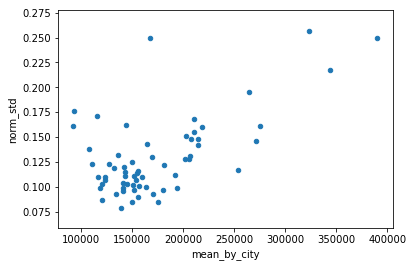

In [17]:
houseprices.plot(kind='scatter', x='mean_by_city', y='norm_std')
plt.show()

In [18]:
scipy.stats.linregress(houseprices.loc[:,'mean_by_city'], houseprices.loc[:, 'norm_std'])

LinregressResult(slope=4.1750840934735046e-07, intercept=0.057316593862217824, rvalue=0.6131854655863016, pvalue=1.1698233803537025e-07, stderr=6.9437054884450746e-08)

The low p_value signifies statistical significance.

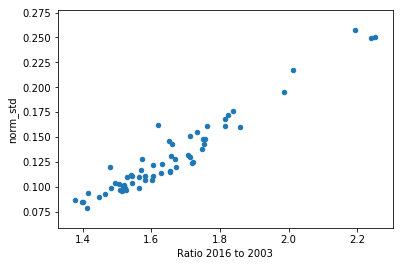

In [19]:
houseprices.plot(kind='scatter', x='Ratio 2016 to 2003', y='norm_std')
plt.show()

In [20]:
scipy.stats.linregress(houseprices.loc[:,'Ratio 2016 to 2003'], houseprices.loc[:, 'norm_std'])

LinregressResult(slope=0.20237679772838946, intercept=-0.20443954954569779, rvalue=0.96337825410571065, pvalue=5.3580616760278242e-36, stderr=0.007272098725650481)

However the variation in standard deviation is very well explained by the total increase over the period. 

# Examining the variation between cities

Notable examples to examine with time series plots:
- London, Oxford and Cambridge: high meand and high std
- Hull, Burnley: lowest mean and average std
- Aberdeen, Coventry, Glasgow: high std and low to avg mean, drop in 2016

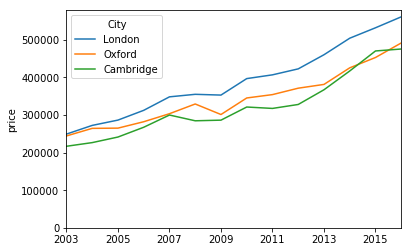

In [21]:
group1 = houseprices.loc[['London', 'Oxford', 'Cambridge'], :'2016'].T
group1.plot()
plt.axis(ymin = 0)
plt.ylabel('price')
plt.show()

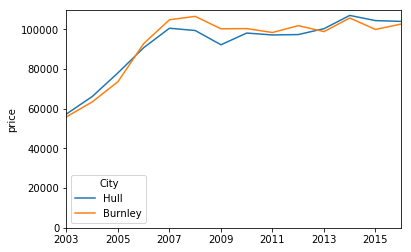

In [22]:
group2 = houseprices.loc[['Hull', 'Burnley'], :'2016'].T
group2.plot()
plt.axis(ymin = 0)
plt.ylabel('price')
plt.show()

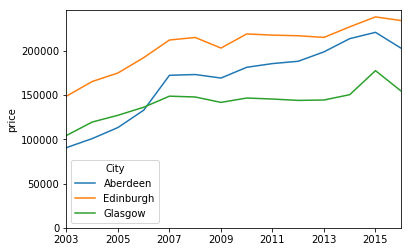

In [23]:
group3 = houseprices.loc[['Aberdeen', 'Edinburgh', 'Glasgow'], :'2016'].T
group3.plot()
plt.axis(ymin = 0)
plt.ylabel('price')
plt.show()

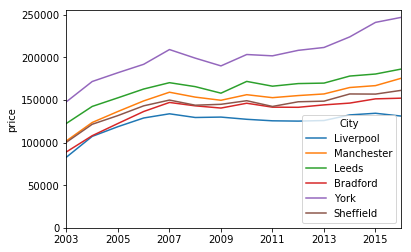

In [24]:
north = houseprices.loc[['Liverpool', 'Manchester', 'Leeds', 'Bradford', 'York', 'Sheffield'], :'2016'].T
north.plot()
plt.axis(ymin = 0)
plt.ylabel('price')
plt.show()

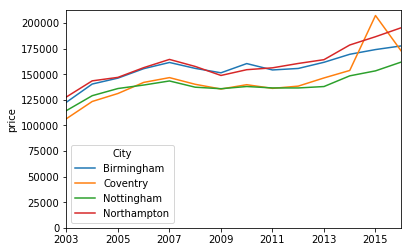

In [25]:
midlands = houseprices.loc[['Birmingham', 'Coventry', 'Nottingham', 'Northampton'], :'2016'].T
midlands.plot()
plt.axis(ymin = 0)
plt.ylabel('price')
plt.show()

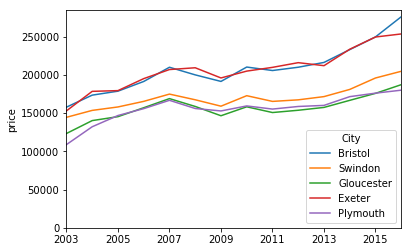

In [26]:
west = houseprices.loc[['Bristol', 'Swindon', 'Gloucester', 'Exeter', 'Plymouth'], :'2016'].T
west.plot()
plt.axis(ymin = 0)
plt.ylabel('price')
plt.show()

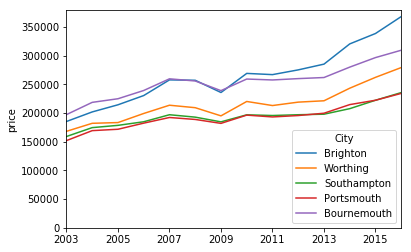

In [27]:
south_coast = houseprices.loc[['Brighton', 'Worthing', 'Southampton', 'Portsmouth', 'Bournemouth'], :'2016'].T
south_coast.plot()
plt.axis(ymin = 0)
plt.ylabel('price')
plt.show()

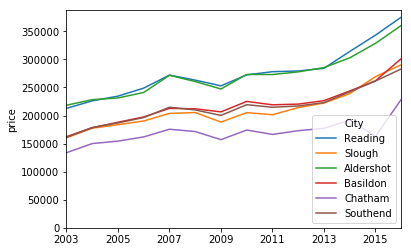

In [28]:
southeast = houseprices.loc[['Reading', 'Slough', 'Aldershot', 'Basildon', 'Chatham', 'Southend'], :'2016'].T
southeast.plot()
plt.axis(ymin = 0)
plt.ylabel('price')
plt.show()

# Population growth as a factor in house price changes 

Population data is provided for the period 2003 to 2015. The following section examines the relationship in population growth as a factor in house price growth from 2003 as the starting year to 2015, for each of the cities given.

In [29]:
population = df2[df2.columns[253:266]]
population.head()

,Population 2003,Population 2004,Population 2005,Population 2006,Population 2007,Population 2008,Population 2009,Population 2010,Population 2011,Population 2012,Population 2013,Population 2014,Population 2015
City,,,,,,,,,,,,,
Aberdeen,209300.0,207800.0,208700.0,209600.0,212500.0,214000.0,217000.0,219700.0,222500.0,224900.0,227100.0,228900.0,230400.0
Aldershot,170700.0,171000.0,172400.0,174300.0,176100.0,176900.0,177700.0,179200.0,180700.0,181500.0,181900.0,182800.0,183400.0
Barnsley,220200.0,221200.0,222600.0,224400.0,226000.0,227800.0,229000.0,230100.0,231900.0,233700.0,235800.0,237800.0,239300.0
Basildon,167100.0,167800.0,168900.0,170000.0,170900.0,172400.0,173100.0,173800.0,175000.0,176500.0,178400.0,180500.0,181700.0
Birkenhead,315400.0,315100.0,314900.0,315400.0,315700.0,316700.0,317800.0,319100.0,319800.0,320200.0,320300.0,320900.0,320900.0


In [30]:
pop_delta = population.iloc[:,-1] / population.iloc[:,0]
prices_delta = houseprices['Ratio 2015 to 2003']


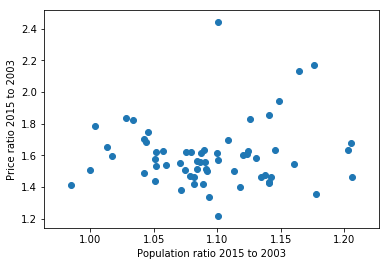

In [31]:
plt.scatter(x=pop_delta, y=prices_delta)
plt.xlabel('Population ratio 2015 to 2003')
plt.ylabel('Price ratio 2015 to 2003')
plt.show()

In [32]:
scipy.stats.linregress(pop_delta, prices_delta)

LinregressResult(slope=0.37103332013346124, intercept=1.1931777645276085, rvalue=0.092847457785237966, pvalue=0.47290774247213752, stderr=0.51367355101313694)

The r-value and p-value do not point to any statistical significance of population growth driving house price growth.

# House price changes year-on-year

This section analyzes the change in house prices for each cities on an annual basis from 2004 to 2016.

In [33]:
hp_pct_chg = houseprices.iloc[:,0:14].pct_change(axis = 1)
hp_pct_chg = hp_pct_chg.drop(['2003'], axis=1)
hp_pct_chg.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,,,
Aberdeen,0.112736,0.124217,0.172908,0.296673,0.004952,-0.022959,0.071860,0.023100,0.014071,0.056539,0.075156,0.033283,-0.081813
Aldershot,0.045713,0.013382,0.042233,0.126857,-0.041031,-0.050784,0.104757,-0.000633,0.017465,0.027516,0.060721,0.085345,0.096811
Barnsley,0.298078,0.098178,0.067479,0.075159,-0.012638,-0.075467,0.024375,-0.033864,0.014108,-0.008693,0.078646,-0.026948,0.003282
Basildon,0.098317,0.055134,0.049599,0.077716,-0.003708,-0.025862,0.090341,-0.026929,0.005786,0.027919,0.076190,0.074385,0.150962
Birkenhead,0.268094,0.073115,0.091459,0.038459,0.002887,-0.017260,0.022220,0.007157,-0.020644,0.002775,0.042019,-0.004911,0.022226


Histogram of annual changes in houseprices for all cities and all years from 2003 to 2015:

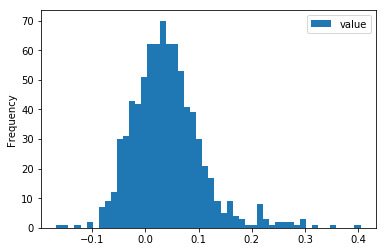

In [34]:
hp_pct_chg_melt = hp_pct_chg.reset_index(drop=False)
hp_pct_chg_melt = pd.melt(hp_pct_chg_melt, id_vars='City')
hp_pct_chg_melt.plot(kind='hist', bins=50)
plt.show()

In [35]:
hp_pct_chg_melt.describe()

,value
count,806.000000
mean,0.040867
std,0.066747
min,-0.167355
25%,-0.001691
50%,0.034974
75%,0.073525
max,0.404155


The mean annual growth is approx. 4.1%, with some outliers at <10% and above 30%. Outliers are examined below:

In [36]:
hp_pct_chg_melt = hp_pct_chg_melt.sort_values(by='value')
hp_pct_chg_melt.head(10)

,City,variable,value
760,Coventry,2016,-0.167355
697,Chatham,2015,-0.150991
767,Glasgow,2016,-0.130661
337,Ipswich,2009,-0.109500
327,Crawley,2009,-0.106232
352,Oxford,2009,-0.085025
325,Chatham,2009,-0.084307
320,Brighton,2009,-0.082891
359,Slough,2009,-0.082748
744,Aberdeen,2016,-0.081813


In [37]:
hp_pct_chg_melt.tail(10)

,City,variable,value
52,Stoke,2004,0.264055
4,Birkenhead,2004,0.268094
7,Blackpool,2004,0.270974
19,Doncaster,2004,0.278731
30,Liverpool,2004,0.293739
186,Aberdeen,2007,0.296673
2,Barnsley,2004,0.298078
54,Swansea,2004,0.322964
698,Coventry,2015,0.349189
759,Chatham,2016,0.404155


Two of the most extreme outliers (Coventry and Chatham) appear in both lists and in adjacent years - meaning a sharp rise/drop in one year followed by a correction in the following year. This may be due to the actual transactions being skewed towards the high/low end in one year. They seem to be genuine values so no need to remove them from the data set.

# Wages as a factor in house price changes

This section examines the influence of average wages on the changes in house prices:

In [38]:
wages = df2[df2.columns[0:13]]
wages.head()

,Average Weekly Workplace Earnings 2004 (£),Average Weekly Workplace Earnings 2005 (£),Average Weekly Workplace Earnings 2006 (£),Average Weekly Workplace Earnings 2007 (£),Average Weekly Workplace Earnings 2008 (£),Average Weekly Workplace Earnings 2009 (£),Average Weekly Workplace Earnings 2010 (£),Average Weekly Workplace Earnings 2011 (£),Average Weekly Workplace Earnings 2012 (£),Average Weekly Workplace Earnings 2013 (£),Average Weekly Workplace Earnings 2014 (£),Average Weekly Workplace Earnings 2015 (£),Average Weekly Workplace Earnings 2016 (£)
City,,,,,,,,,,,,,
Aberdeen,588.758170,594.615385,612.781955,598.288509,624.704492,632.870370,629.451288,608.788853,574.7,589.0,623.8,615.0,593.4
Aldershot,710.333677,675.395560,708.987987,711.109602,708.780032,734.156977,633.790239,659.812059,600.9,568.9,596.6,592.5,566.0
Barnsley,484.967320,483.333333,473.809524,485.330073,483.687943,487.384259,473.796193,453.697749,426.2,435.4,451.8,461.2,451.5
Basildon,601.960784,600.128205,585.463659,590.709046,590.661939,570.601852,523.740202,538.370847,474.3,506.1,477.6,514.4,518.2
Birkenhead,435.555556,463.846154,465.664160,467.481663,455.200946,440.972222,424.076148,400.535906,372.6,394.6,422.2,428.0,428.1


In [39]:
wages_pct_chg = wages.pct_change(axis=1)
wages_pct_chg = wages_pct_chg.reset_index(drop=False)
wages_pct_chg.head()

,City,Average Weekly Workplace Earnings 2004 (£),Average Weekly Workplace Earnings 2005 (£),Average Weekly Workplace Earnings 2006 (£),Average Weekly Workplace Earnings 2007 (£),Average Weekly Workplace Earnings 2008 (£),Average Weekly Workplace Earnings 2009 (£),Average Weekly Workplace Earnings 2010 (£),Average Weekly Workplace Earnings 2011 (£),Average Weekly Workplace Earnings 2012 (£),Average Weekly Workplace Earnings 2013 (£),Average Weekly Workplace Earnings 2014 (£),Average Weekly Workplace Earnings 2015 (£),Average Weekly Workplace Earnings 2016 (£)
0,Aberdeen,NaN,0.009948,0.030552,-0.023652,0.044153,0.013072,-0.005403,-0.032826,-0.055995,0.024883,0.059083,-0.014107,-0.035122
1,Aldershot,NaN,-0.049186,0.049737,0.002992,-0.003276,0.035804,-0.136710,0.041057,-0.089286,-0.053253,0.048690,-0.006872,-0.044726
2,Barnsley,NaN,-0.003369,-0.019704,0.024315,-0.003384,0.007642,-0.027880,-0.042420,-0.060608,0.021586,0.037667,0.020806,-0.021032
3,Basildon,NaN,-0.003044,-0.024436,0.008959,-0.000080,-0.033962,-0.082127,0.027935,-0.119009,0.067046,-0.056313,0.077052,0.007387
4,Birkenhead,NaN,0.064953,0.003919,0.003903,-0.026270,-0.031258,-0.038316,-0.055509,-0.069746,0.059045,0.069944,0.013738,0.000234


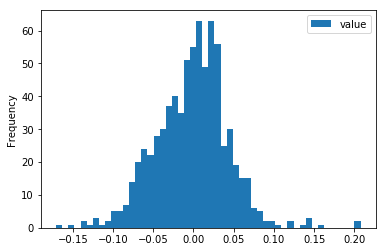

In [40]:
wages_pct_melted = pd.melt(wages_pct_chg, id_vars='City')
wages_pct_melted.plot(kind='hist', bins=50)
plt.show()

In [41]:
wages_pct_melted.describe()

,value
count,744.000000
mean,-0.001756
std,0.045148
min,-0.170627
25%,-0.029388
50%,0.001466
75%,0.025737
max,0.207587


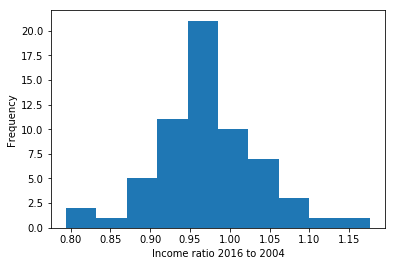

In [42]:
wages_change_2003_2016 = wages.iloc[:,-1] / wages.iloc[:,0]
wages_change_2003_2016.plot(kind='hist')
plt.xlabel('Income ratio 2016 to 2004')
plt.show()

In contrast to houseprices which have increased from 2003 to 2016 by 40% to 120% depending on the city, average wages for the cities considered have ranged from a 20% decline to a 15% increase. The following scatter plot examines the relationship between average wages and houseprices for the cities considered.

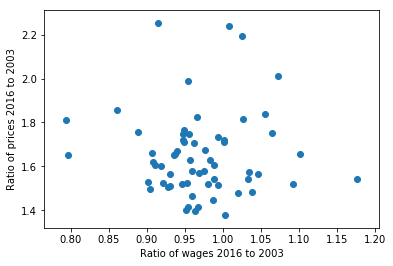

In [43]:
prices_delta_2016 = houseprices['Ratio 2016 to 2003']
plt.scatter(x = wages_change_2003_2016, y = prices_delta_2016)
plt.xlabel('Ratio of wages 2016 to 2003')
plt.ylabel('Ratio of prices 2016 to 2003')
plt.show()

In [44]:
scipy.stats.linregress(wages_change_2003_2016, prices_delta_2016)

LinregressResult(slope=-0.035757244278745728, intercept=1.6849196164412457, rvalue=-0.012221228489308327, pvalue=0.92489058588920314, stderr=0.37769489708513054)

The linear regression shows no relationship of statistical significance between wages and house prices. The cities with the largest house price increases are not those that have experienced wage increase, and those with the greatest wage drops have still experienced average house price increases.

In [45]:
hp_04_16 = houseprices.loc[:, '2004':'2016']
hp_04_16.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,,,
Aberdeen,100759.6896,113275.7769,132862.0914,172278.6259,173131.7494,169156.8676,181312.5055,185500.8876,188111.0411,198746.7409,213683.6765,220795.7395,202731.816592
Aldershot,228235.4535,231289.8085,241057.7736,271637.5992,260492.1135,247263.2810,273165.7983,272992.9683,277760.7478,285403.5038,302733.5712,328570.4755,360379.764064
Barnsley,102751.8894,112839.8151,120454.1528,129507.3882,127870.7255,118220.6498,121102.2502,117001.2571,118651.9165,117620.4456,126870.8695,123452.0000,123857.227670
Basildon,178237.5256,188064.3866,197392.2405,212732.7405,211944.0278,206462.8052,225114.9079,219052.7751,220320.3236,226471.5331,243726.3460,261856.0000,301386.174922
Birkenhead,132319.0280,141993.4710,154980.0550,160940.4484,161405.1566,158619.3503,162143.8566,163304.3752,159933.1423,160376.9457,167115.7523,166295.0000,169991.128225


In [46]:
wages_annual = (wages*52)
wages_annual.columns = hp_04_16.columns
wages_annual.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,,,
Aberdeen,30615.424835,30919.999999,31864.661655,31111.002447,32484.633568,32909.259261,32731.466966,31657.020366,29884.4,30628.0,32437.6,31980.0,30856.8
Aldershot,36937.351220,35120.569104,36867.375334,36977.699299,36856.561659,38176.162788,32957.092433,34310.227073,31246.8,29582.8,31023.2,30810.0,29432.0
Barnsley,25218.300656,25133.333332,24638.095238,25237.163812,25151.773052,25343.981484,24637.402015,23592.282958,22162.4,22640.8,23493.6,23982.4,23478.0
Basildon,31301.960784,31206.666665,30444.110273,30716.870418,30714.420802,29671.296299,27234.490483,27995.284028,24663.6,26317.2,24835.2,26748.8,26946.4
Birkenhead,22648.888891,24119.999998,24214.536341,24309.046455,23670.449171,22930.555554,22051.959686,20827.867096,19375.2,20519.2,21954.4,22256.0,22261.2


Affordability ratio: the number of years' average wages needed to purchase an average house for each city

In [47]:
afford = hp_04_16 / wages_annual
afford.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,,,
Aberdeen,3.291141,3.663512,4.169575,5.537547,5.329651,5.140100,5.539394,5.859708,6.294623,6.489054,6.587530,6.904182,6.570086
Aldershot,6.178988,6.585594,6.538512,7.345984,7.067727,6.476902,8.288528,7.956606,8.889254,9.647616,9.758296,10.664410,12.244488
Barnsley,4.074497,4.489648,4.888939,5.131614,5.083965,4.664644,4.915382,4.959302,5.353749,5.195066,5.400231,5.147608,5.275459
Basildon,5.694133,6.026417,6.483758,6.925599,6.900473,6.958335,8.265802,7.824631,8.933016,8.605457,9.813746,9.789448,11.184655
Birkenhead,5.842186,5.886960,6.400290,6.620599,6.818846,6.917379,7.352809,7.840667,8.254529,7.815945,7.611948,7.471918,7.636207


In [48]:
mean_by_year, std_by_year = afford.mean(axis=0), afford.std(axis=0)
mean_by_year

2004    5.315704
2005    5.633727
2006    5.935482
2007    6.322780
2008    6.147247
2009    5.943546
2010    6.440306
2011    6.639348
2012    7.175330
2013    7.136042
2014    7.625169
2015    7.815817
2016    7.963958
dtype: float64

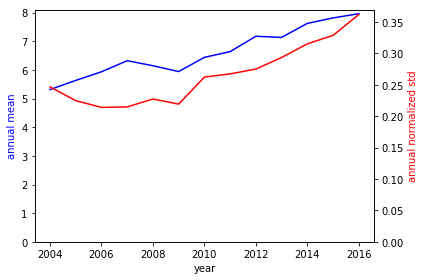

In [49]:
fig, ax1 = plt.subplots()

ax1.plot(mean_by_year, 'b-')
ax1.set_xlabel('year')
ax1.set_ylabel('annual mean', color='b')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.plot(std_by_year / mean_by_year, 'r-')
ax2.set_ylabel('annual normalized std', color='r')
ax2.set_ylim(bottom=0)
#ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

On average it has become increasingly difficult to afford a house - the number of annual wages needed to buy a home (averaged across all 62 cities) has oncreased from 5.3 in 2004 to 8.0 in 2016. The variation between cities has also increased, meaning that 

# Employment as a factor

In [50]:
employment = df2.iloc[:,134:146]
employment.head()

,Employment Rate 2004 (%),Employment Rate 2005 (%),Employment Rate 2006 (%),Employment Rate 2007 (%),Employment Rate 2008 (%),Employment Rate 2009 (%),Employment Rate 2010 (%),Employment Rate 2011 (%),Employment Rate 2012 (%),Employment Rate 2013 (%),Employment Rate 2014 (%),Employment Rate 2015 (%)
City,,,,,,,,,,,,
Aberdeen,76.0,76.9,80.1,77.8,78.0,78.3,76.3,76.3,75.1,76.3,76.2,75.8
Aldershot,81.0,83.2,83.2,82.4,79.9,78.9,77.4,78.1,71.2,77.9,83.4,83.8
Barnsley,69.0,67.1,67.1,67.5,65.2,67.3,63.6,66.8,68.9,72.4,73.3,71.1
Basildon,74.7,75.6,76.9,74.8,69.4,71.4,72.9,76.7,68.4,74.3,76.9,77.1
Birkenhead,68.7,70.0,67.4,67.6,66.7,66.5,67.6,68.6,70.9,67.7,67.4,69.7


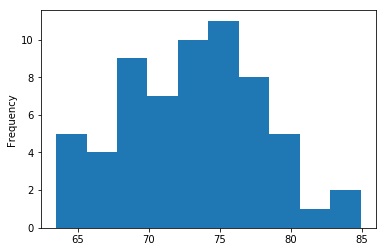

In [51]:
emp_2015 = employment.iloc[:,-1]
emp_2015.plot(kind='hist')
plt.show()

Does a higher employment rate correlate to higher house prices?

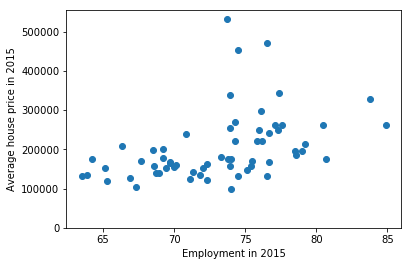

In [52]:
prices_2015 = houseprices.loc[:,'2015']
plt.scatter(x=emp_2015, y=prices_2015)
plt.axis(ymin = 0)
plt.xlabel('Employment in 2015')
plt.ylabel('Average house price in 2015')
plt.show()

In [53]:
scipy.stats.linregress(emp_2015, prices_2015)

LinregressResult(slope=7733.6974025245236, intercept=-362057.43026893004, rvalue=0.42952884043601064, pvalue=0.00049429854700009746, stderr=2099.0970972822956)

In [54]:
prices_2015.nlargest(10)

City
London         532290.1442
Cambridge      470602.1327
Oxford         453215.9185
Reading        343159.3764
Brighton       338400.7810
Aldershot      328570.4755
Bournemouth    296454.7948
Slough         269211.1081
Crawley        262870.3409
Worthing       262046.5846
Name: 2015, dtype: float64

The result here shows a clearer and statistically significant positive trend, with the exception of 3 outliers with the highest prices (London, Cambridge, Oxford). For these 3 cities the key factor in house prices is most likely somethg else, but for the rest of the cities, employment is definitely an important factor.

# Housing stock as a factor

This section consider the effect of housing stock on house prices. The argument would essentially be a question of supply and demand, so that a city with housing stock growth that did not keep up with population growth would experience higher than average price growth. 

In [55]:
housing_stock = df2.iloc[:,182:194]
housing_stock.columns = housing_stock.columns.str.extract('([0-9]+)')
housing_stock.head()


C:\Users\Work\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,
Aberdeen,106754.0,107670.0,108618.0,109425.0,110084.0,110565.0,110968.0,111419.0,112073.0,112713.0,113508.0,114234.0
Aldershot,69330.0,69750.0,70540.0,71460.0,71630.0,72020.0,72350.0,72390.0,72740.0,73210.0,73540.0,73940.0
Barnsley,98110.0,99440.0,100390.0,101350.0,102520.0,103400.0,103960.0,104980.0,105800.0,106460.0,107210.0,107830.0
Basildon,71510.0,71690.0,72200.0,72430.0,72790.0,73310.0,73820.0,74030.0,74680.0,75330.0,75450.0,76120.0
Birkenhead,140880.0,141460.0,141980.0,142940.0,143990.0,144690.0,145240.0,145690.0,145720.0,145970.0,146270.0,146810.0


In [56]:
population_data = population.iloc[:,1:]
population_data.columns = housing_stock.columns
population_data.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,
Aberdeen,207800.0,208700.0,209600.0,212500.0,214000.0,217000.0,219700.0,222500.0,224900.0,227100.0,228900.0,230400.0
Aldershot,171000.0,172400.0,174300.0,176100.0,176900.0,177700.0,179200.0,180700.0,181500.0,181900.0,182800.0,183400.0
Barnsley,221200.0,222600.0,224400.0,226000.0,227800.0,229000.0,230100.0,231900.0,233700.0,235800.0,237800.0,239300.0
Basildon,167800.0,168900.0,170000.0,170900.0,172400.0,173100.0,173800.0,175000.0,176500.0,178400.0,180500.0,181700.0
Birkenhead,315100.0,314900.0,315400.0,315700.0,316700.0,317800.0,319100.0,319800.0,320200.0,320300.0,320900.0,320900.0


In [57]:
pop_to_house = population_data / housing_stock
pop_to_house

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,
Aberdeen,1.946531,1.938330,1.929699,1.941969,1.943970,1.962646,1.979850,1.996966,2.006728,2.014852,2.016598,2.016913
Aldershot,2.466465,2.471685,2.470938,2.464316,2.469636,2.467370,2.476849,2.496201,2.495188,2.484633,2.485722,2.480390
Barnsley,2.254612,2.238536,2.235282,2.229896,2.222005,2.214700,2.213351,2.208992,2.208885,2.214916,2.218077,2.219234
Basildon,2.346525,2.355977,2.354571,2.359520,2.368457,2.361206,2.354376,2.363907,2.363417,2.368246,2.392313,2.387020
Birkenhead,2.236655,2.226071,2.221440,2.208619,2.199458,2.196420,2.197053,2.195072,2.197365,2.194286,2.193888,2.185818
Birmingham,2.416174,2.418486,2.413085,2.414024,2.419674,2.425889,2.435147,2.448237,2.455487,2.460022,2.467150,2.470732
Blackburn,2.460414,2.476473,2.468092,2.472084,2.463448,2.481752,2.481431,2.477357,2.476111,2.462824,2.442151,2.434898
Blackpool,2.121773,2.116428,2.107801,2.101575,2.078293,2.062441,2.061544,2.051909,2.041963,2.034373,2.028350,2.016924
Bournemouth,2.155190,2.152272,2.142892,2.153713,2.147933,2.142520,2.163342,2.181045,2.192284,2.195969,2.208583,2.211737


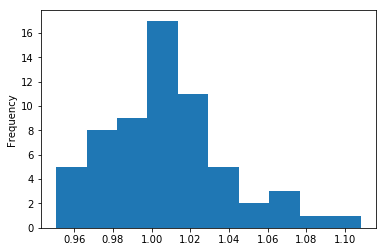

In [58]:
pop_to_house_delta = pop_to_house.loc[:,'2015'] / pop_to_house.loc[:,'2004']
pop_to_house_delta.plot(kind='hist')
plt.show()

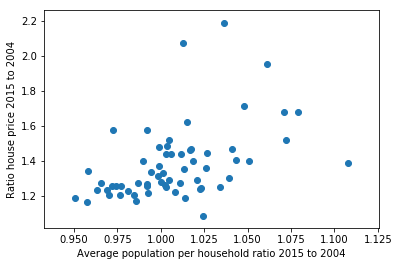

In [59]:
hp_delta_15_04 = houseprices.loc[:,'2015'] / houseprices.loc[:,'2004']
plt.scatter(pop_to_house_delta, hp_delta_15_04)
plt.xlabel('Average population per household ratio 2015 to 2004')
plt.ylabel('Ratio house price 2015 to 2004')
plt.show()

In [60]:
scipy.stats.linregress(pop_to_house_delta, hp_delta_15_04)

LinregressResult(slope=3.1068752996035132, intercept=-1.75002443887797, rvalue=0.46741261437630005, pvalue=0.00012805166967188908, stderr=0.7586113399376806)

The p-value here indicates statistical significance - we can conclude that there is a relationship between the population per house in a city and house price increases. However the causality can be either way, i.e. shortage of housing stock may have pushed up prices, or alternatively the increase in prices have forced a higher number of people per household.

# Machine Learning Application to the Data Set

## Constructing the Features Matrix 

In [429]:
features = pd.concat([wages, employment, pop_to_house], axis=1)
features = features.reset_index()
features.shape

(62, 38)

In [430]:
import sklearn

In [431]:
features.head()

,City,Average Weekly Workplace Earnings 2004 (£),Average Weekly Workplace Earnings 2005 (£),Average Weekly Workplace Earnings 2006 (£),Average Weekly Workplace Earnings 2007 (£),Average Weekly Workplace Earnings 2008 (£),Average Weekly Workplace Earnings 2009 (£),Average Weekly Workplace Earnings 2010 (£),Average Weekly Workplace Earnings 2011 (£),Average Weekly Workplace Earnings 2012 (£),...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aberdeen,588.758170,594.615385,612.781955,598.288509,624.704492,632.870370,629.451288,608.788853,574.7,...,1.929699,1.941969,1.943970,1.962646,1.979850,1.996966,2.006728,2.014852,2.016598,2.016913
1,Aldershot,710.333677,675.395560,708.987987,711.109602,708.780032,734.156977,633.790239,659.812059,600.9,...,2.470938,2.464316,2.469636,2.467370,2.476849,2.496201,2.495188,2.484633,2.485722,2.480390
2,Barnsley,484.967320,483.333333,473.809524,485.330073,483.687943,487.384259,473.796193,453.697749,426.2,...,2.235282,2.229896,2.222005,2.214700,2.213351,2.208992,2.208885,2.214916,2.218077,2.219234
3,Basildon,601.960784,600.128205,585.463659,590.709046,590.661939,570.601852,523.740202,538.370847,474.3,...,2.354571,2.359520,2.368457,2.361206,2.354376,2.363907,2.363417,2.368246,2.392313,2.387020
4,Birkenhead,435.555556,463.846154,465.664160,467.481663,455.200946,440.972222,424.076148,400.535906,372.6,...,2.221440,2.208619,2.199458,2.196420,2.197053,2.195072,2.197365,2.194286,2.193888,2.185818


## Clustering Analysis 

### K-Means Clustering

In [432]:
X = features.iloc[:,1:].values

In [433]:
from sklearn.cluster import KMeans
k_range = range(1,11)
kmeans = [KMeans(n_clusters=k).fit(X) for k in k_range]
centroids = [x.cluster_centers_ for x in kmeans]
scores = [x.score(X) for x in kmeans]

In [434]:
print scores

[-3448738.761836627, -1144957.2972579105, -696324.58098388975, -458834.48787944764, -381063.20848650439, -330399.91392334038, -283274.45385241415, -260464.07155315811, -237825.82013172284, -220333.18580617337]


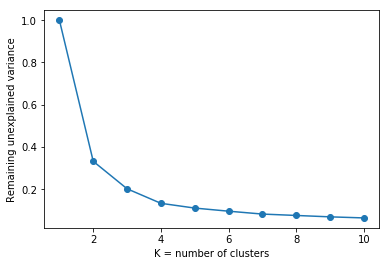

In [435]:
# total sum of squares
from scipy.spatial.distance import cdist, pdist
tss = sum(pdist(X)**2)/X.shape[0]

# elbow plot of remaining unexplained variance after clustering (score for the fit / total variance in the data set)
plt.plot(k_range, (scores/-tss), marker='o')
plt.xlabel('K = number of clusters')
plt.ylabel('Remaining unexplained variance')
plt.show()

The elbow plot shows that 4 clusters explain most of the variance in the data set and gains are only marginal at K>4. For the following analysis K=[2,3,4,5] are examined to select the optimium value of K.

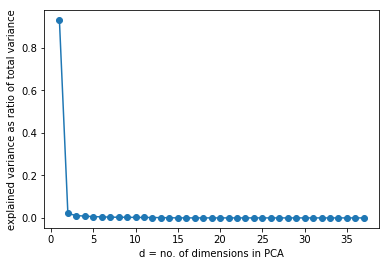

In [436]:
from sklearn.decomposition import PCA

pca = PCA()
y = pca.fit(X).explained_variance_ratio_
x = range(1,len(y)+1)

plt.plot(x, y, marker='o')
plt.xlabel('d = no. of dimensions in PCA')
plt.ylabel('explained variance as ratio of total variance')
plt.show()

In [447]:
from sklearn.metrics import silhouette_samples, silhouette_score
k=3
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(X)
clust, count = np.unique(kmeans.labels_, return_counts=True)
centroids = kmeans.cluster_centers_
print(zip(clust, count))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, cluster_labels))


[(0, 32), (1, 10), (2, 20)]
Silhouette Coefficient: 0.453


In [448]:
pca1 = PCA(2)
X2d = pca1.fit_transform(X)
centroids2d = pca1.transform(centroids)
centroids2d

array([[-161.56827774,    1.72966585],
       [ 432.99596169,  -10.02773009],
       [  42.01126354,    2.24639968]])

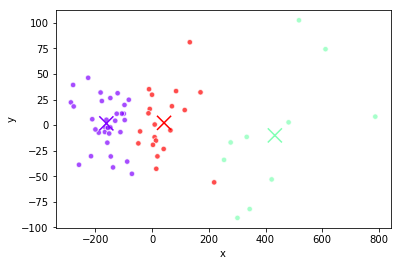

In [449]:
plt.scatter(x=X2d[:,0], y=X2d[:,1], c=kmeans.labels_, cmap= 'rainbow', alpha = 0.7, edgecolors='w', s=30)
plt.scatter(x=centroids2d[:,0], y=centroids2d[:,1], marker='x', c=range(0,k), cmap='rainbow', s=200)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [450]:
features.loc[:,'cluster'] = kmeans.labels_


In [451]:
df_clustered = features.groupby('cluster').mean()
df_clustered

,Average Weekly Workplace Earnings 2004 (£),Average Weekly Workplace Earnings 2005 (£),Average Weekly Workplace Earnings 2006 (£),Average Weekly Workplace Earnings 2007 (£),Average Weekly Workplace Earnings 2008 (£),Average Weekly Workplace Earnings 2009 (£),Average Weekly Workplace Earnings 2010 (£),Average Weekly Workplace Earnings 2011 (£),Average Weekly Workplace Earnings 2012 (£),Average Weekly Workplace Earnings 2013 (£),...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
cluster,,,,,,,,,,,,,,,,,,,,,
0,473.597072,473.413135,483.919025,487.272504,490.568332,484.573512,479.518186,453.209471,430.596875,442.2375,...,2.289808,2.282986,2.277705,2.274428,2.279053,2.282495,2.285081,2.287605,2.289685,2.290420
1,646.208042,638.347844,653.670924,649.688828,673.372712,664.005086,637.514090,627.500184,587.950000,596.7300,...,2.351492,2.346973,2.346129,2.350629,2.371857,2.390025,2.400059,2.406085,2.408536,2.412038
2,536.228619,536.951330,543.365410,550.078650,547.180674,543.761113,536.514306,507.779593,473.230000,492.0100,...,2.311572,2.301244,2.296652,2.295746,2.304748,2.317544,2.324198,2.331622,2.341930,2.349841


In [452]:
cities_list = features.groupby('cluster')['City'].apply(list)
df_clustered.loc[:,'cities_by_cluster'] = cities_list

In [453]:
houseprices_clustered = houseprices.reset_index()
houseprices_clustered.loc[:, 'cluster'] = kmeans.labels_
houseprices_clustered.groupby('cluster')['Ratio 2016 to 2003', 'mean_by_city', 'norm_std', '2016'].mean()


,Ratio 2016 to 2003,mean_by_city,norm_std,2016
cluster,,,,
0,1.619819,152233.966004,0.119272,178496.342768
1,1.844652,239879.496347,0.176118,320822.123637
2,1.601768,172705.590662,0.122663,210636.837809


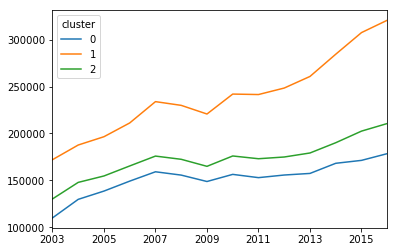

In [454]:
hc_mean = houseprices_clustered.groupby('cluster').mean()
hc_mean = hc_mean.iloc[:,:14].T
hc_mean.plot()

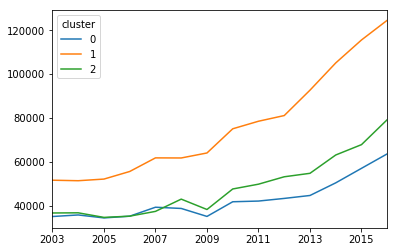

In [455]:
hc_std = houseprices_clustered.groupby('cluster').std()
hc_std = hc_std.iloc[:,:14].T
hc_std.plot()

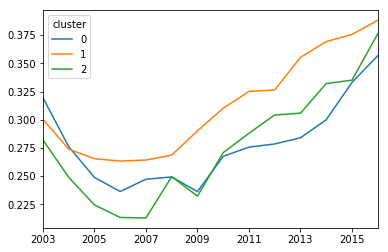

In [456]:
hc_std_norm = hc_std.divide(hc_mean)
hc_std_norm.plot()

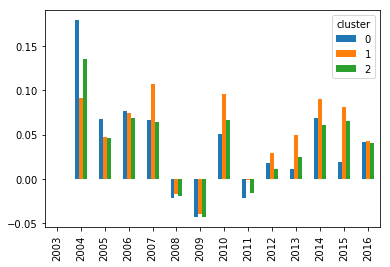

In [457]:
hc_growth = hc_mean.pct_change()
hc_growth.plot(kind='bar')

In [458]:
prices_2016_clustered = houseprices_clustered.groupby('cluster')['2016'].apply(list)


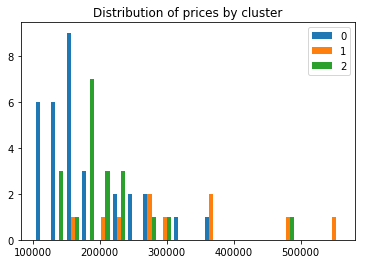

In [459]:
n_bins = 20
x = prices_2016_clustered
fig, axes = plt.subplots()

axes.hist(x, n_bins, histtype='bar', label=list(clust))
axes.set_title('Distribution of prices by cluster')
axes.legend(prop={'size': 10})

#fig.tight_layout()
plt.show()

In [460]:
clust0 = houseprices_clustered[houseprices_clustered.cluster == 0].loc[:,['City', '2016']].sort_values(by='2016', ascending=False)
clust0.City.values

array(['Brighton', 'Bournemouth', 'Southend', 'Worthing', 'Exeter', 'York',
       'Chatham', 'Norwich', 'Ipswich', 'Plymouth', 'Leicester',
       'Birkenhead', 'Preston', 'Huddersfield', 'Nottingham', 'Sheffield',
       'Newcastle', 'Telford', 'Newport', 'Bradford', 'Wakefield',
       'Swansea', 'Middlesbrough', 'Doncaster', 'Mansfield', 'Wigan',
       'Stoke', 'Barnsley', 'Sunderland', 'Blackburn', 'Hull', 'Burnley'], dtype=object)

In [461]:
clust1 = houseprices_clustered[houseprices_clustered.cluster == 1].loc[:,['City', '2016']].sort_values(by='2016', ascending=False)
clust1.City.values

array(['London', 'Cambridge', 'Reading', 'Aldershot', 'Slough', 'Crawley',
       'Milton Keynes', 'Edinburgh', 'Aberdeen', 'Derby'], dtype=object)

In [462]:
clust2 = houseprices_clustered[houseprices_clustered.cluster == 2].loc[:,['City', '2016']].sort_values(by='2016', ascending=False)
clust2.City.values

array(['Oxford', 'Basildon', 'Bristol', 'Southampton', 'Portsmouth',
       'Luton', 'Cardiff', 'Swindon', 'Northampton', 'Warrington',
       'Gloucester', 'Leeds', 'Peterborough', 'Birmingham', 'Manchester',
       'Coventry', 'Glasgow', 'Blackpool', 'Liverpool', 'Dundee'], dtype=object)

In [463]:
clust3 = houseprices_clustered[houseprices_clustered.cluster == 3].loc[:,['City', '2016']].sort_values(by='2016', ascending=False)
clust3.City.values

array([], dtype=object)

The clustering seems to work well for most of the UK towns, with the exception of places such as London and towns that gravitate towards London (Reading, Aldershot) and Oxford, Cambridge and Brighton. 

A DBSCAN analysis was performed to see if some of these will be picked up as noise - however it placed all data points in the 'noise' cluster, so algorithm does not work on this data set for some reason.

Affinity Propagation may be used to group together cities with a similar behaviour pattern (and is used in the sklearn documentation to cluster stocks: http://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html#sphx-glr-auto-examples-applications-plot-stock-market-py). The method also decides on the optimum number of clusters and does not enforce similalry sized clusters.



### Affinity Propagation 

In [464]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(damping=0.7)
ap_clusters = ap.fit_predict(X)
clust, count = np.unique(ap_clusters, return_counts=True)
print (zip(clust, count))
# silhouette coefficient
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, ap_clusters))
print (ap.cluster_centers_indices_)

[(0, 3), (1, 3), (2, 7), (3, 4), (4, 5), (5, 1), (6, 12), (7, 27)]
Silhouette Coefficient: 0.278
[ 0  1 11 21 25 31 33 48]


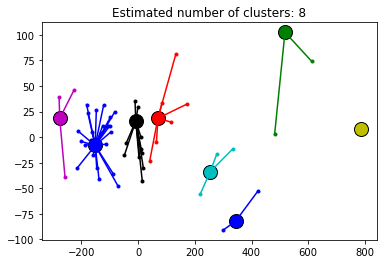

In [465]:
# Plot result - from scikit learn demo
from itertools import cycle
#from sklearn.datasets.samples_generator import make_blobs
from matplotlib.pyplot import cm 

plt.close('all')
plt.figure(1)
plt.clf()

#dim_red = PCA(n_components=2)
#X = dim_red.fit_transform(x_cols)
                            
cluster_centers_indices = ap.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = ap.labels_

colors = cycle('bgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X2d[cluster_centers_indices[k]]
    plt.plot(X2d[class_members, 0], X2d[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], col, markersize=14, marker='o', markerfacecolor=col, markeredgecolor='k')
    for x in X2d[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], c=col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [466]:
features_AP = features.copy()
features_AP['cluster'] = ap_clusters
features_AP.head()

,City,Average Weekly Workplace Earnings 2004 (£),Average Weekly Workplace Earnings 2005 (£),Average Weekly Workplace Earnings 2006 (£),Average Weekly Workplace Earnings 2007 (£),Average Weekly Workplace Earnings 2008 (£),Average Weekly Workplace Earnings 2009 (£),Average Weekly Workplace Earnings 2010 (£),Average Weekly Workplace Earnings 2011 (£),Average Weekly Workplace Earnings 2012 (£),...,2007,2008,2009,2010,2011,2012,2013,2014,2015,cluster
0,Aberdeen,588.758170,594.615385,612.781955,598.288509,624.704492,632.870370,629.451288,608.788853,574.7,...,1.941969,1.943970,1.962646,1.979850,1.996966,2.006728,2.014852,2.016598,2.016913,0
1,Aldershot,710.333677,675.395560,708.987987,711.109602,708.780032,734.156977,633.790239,659.812059,600.9,...,2.464316,2.469636,2.467370,2.476849,2.496201,2.495188,2.484633,2.485722,2.480390,1
2,Barnsley,484.967320,483.333333,473.809524,485.330073,483.687943,487.384259,473.796193,453.697749,426.2,...,2.229896,2.222005,2.214700,2.213351,2.208992,2.208885,2.214916,2.218077,2.219234,7
3,Basildon,601.960784,600.128205,585.463659,590.709046,590.661939,570.601852,523.740202,538.370847,474.3,...,2.359520,2.368457,2.361206,2.354376,2.363907,2.363417,2.368246,2.392313,2.387020,2
4,Birkenhead,435.555556,463.846154,465.664160,467.481663,455.200946,440.972222,424.076148,400.535906,372.6,...,2.208619,2.199458,2.196420,2.197053,2.195072,2.197365,2.194286,2.193888,2.185818,4


In [467]:
houseprices_clustered_AP = houseprices.reset_index()
houseprices_clustered_AP.loc[:, 'cluster'] = ap_clusters
df_AP = houseprices_clustered_AP.groupby('cluster')['Ratio 2016 to 2003', 'mean_by_city', 'norm_std', '2016'].mean()
cities_AP = houseprices_clustered_AP.groupby('cluster')['City'].apply(list)
df_AP.loc[:,'Cities by cluster'] = cities_AP
df_AP.loc[:,'Cluster size'] = count
df_AP

,Ratio 2016 to 2003,mean_by_city,norm_std,2016,Cities by cluster,Cluster size
cluster,,,,,,
0,1.829057,173061.593124,0.166900,214960.943377,"[Aberdeen, Crawley, Derby]",3
1,1.742583,252531.708561,0.158129,342052.827052,"[Aldershot, Reading, Slough]",3
2,1.586606,181718.638836,0.122954,224002.312457,"[Basildon, Bristol, Coventry, Leeds, Portsmout...",7
3,1.873096,268916.354492,0.188372,366913.513912,"[Cambridge, Edinburgh, Milton Keynes, Oxford]",4
4,1.675940,145402.645867,0.131234,169503.206577,"[Birkenhead, Burnley, Huddersfield, Southend, ...",5
5,2.251657,390284.518783,0.249957,561436.596861,[London],1
6,1.576390,153178.871921,0.114602,179400.820129,"[Birmingham, Blackpool, Cardiff, Dundee, Glasg...",12
7,1.609427,153499.025289,0.117057,180161.738359,"[Barnsley, Blackburn, Bournemouth, Bradford, B...",27


In [468]:
X.shape

(62L, 37L)

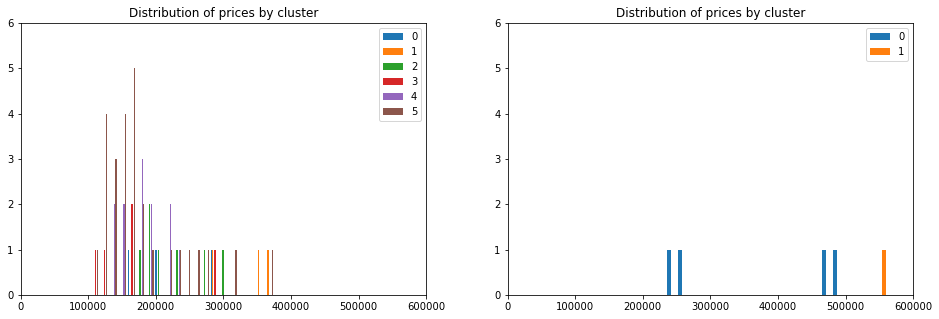

In [469]:
n_bins = 20
x = houseprices_clustered_AP.groupby('cluster')['2016'].apply(list)
fig, axes = plt.subplots(1,2,figsize=(16,5))
ax0, ax1 = axes.flatten()

ax0.hist(x[[0,1, 2,4,6,7]], n_bins, histtype='bar', label=list(clust))
ax0.set_title('Distribution of prices by cluster')
ax0.set_xlim(0, 600000)
ax0.set_ylim(0, 6)
ax0.legend(prop={'size': 10})

ax1.hist(x[[3,5]], n_bins, histtype='bar', label=list(clust))
ax1.set_title('Distribution of prices by cluster')
ax1.set_xlim(0, 600000)
ax1.set_ylim(0, 6)
ax1.legend(prop={'size': 10})

plt.show()

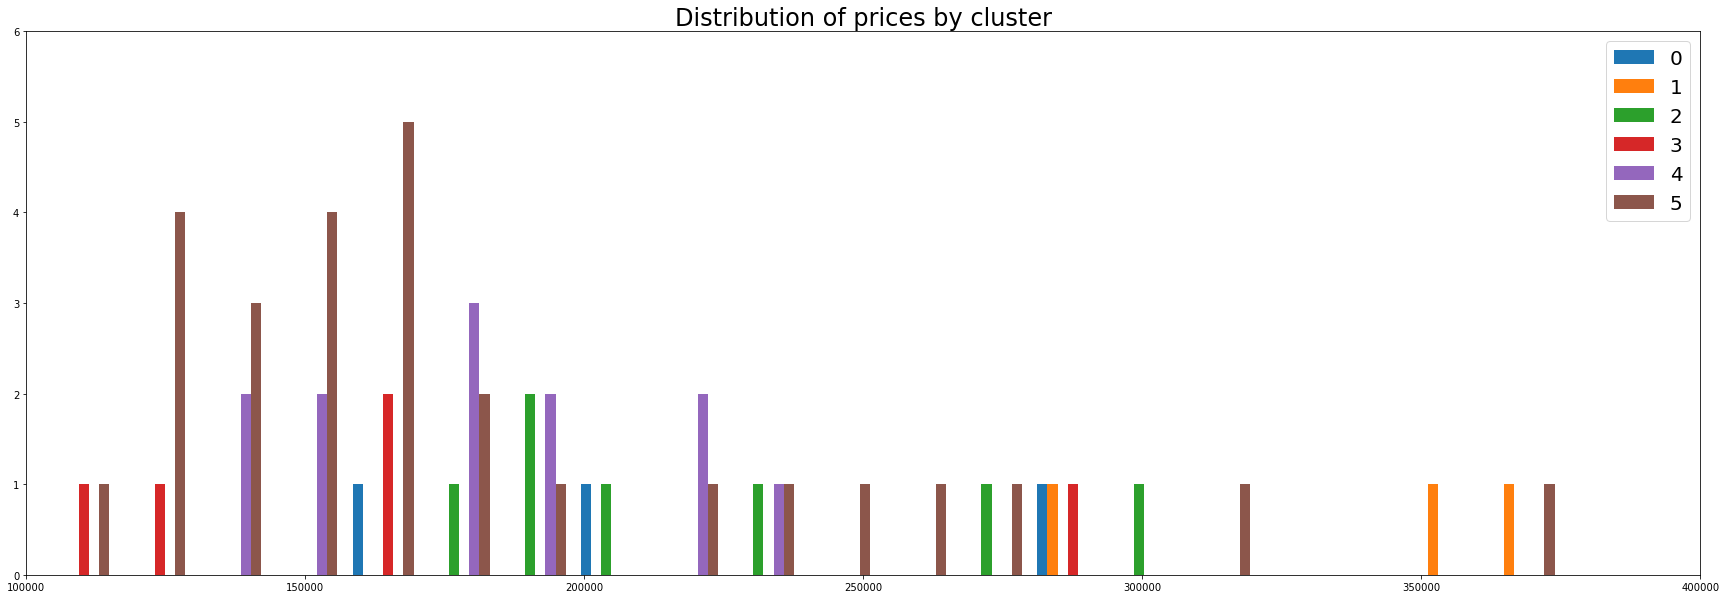

In [470]:
n_bins = 20
x = houseprices_clustered_AP.groupby('cluster')['2016'].apply(list)
fig, ax0 = plt.subplots(1,1,figsize=(30,10))
#ax0 = axes.flatten()

ax0.hist(x[[0,1,2,4,6,7]], n_bins, histtype='bar', label=list(clust))
ax0.set_title('Distribution of prices by cluster', fontsize=24)
ax0.set_xlim(100000, 400000)
ax0.set_ylim(0, 6)
ax0.legend(prop={'size': 20})


plt.show()

## Linear Regression

### Adding FTSE Data to the Features Matrix 

In [471]:
ftse = pd.read_excel('data/FTSE_monthly.xlsx')
ftse.loc[:,'Year'] = ftse.Date.apply(lambda x: x.year)
ftse_annual = ftse.groupby('Year').mean()
#ftse_annual = ftse_annual.reset_index().sort_values(by='Year')
ftse_annual

,Price,Open,High,Low,Change
Year,,,,,
2003,4029.835833,3985.133333,4173.091667,3872.150000,0.011575
2004,4519.822500,4491.716667,4613.041667,4422.041667,0.006225
2005,5167.510833,5100.483333,5254.700000,5037.475000,0.013217
2006,5940.907500,5890.725000,6048.391667,5758.591667,0.008767
2007,6425.190000,6405.516667,6570.283333,6187.491667,0.003417
2008,5356.945833,5525.512500,5681.557500,5002.611667,-0.029025
2009,4593.000000,4511.440833,4771.403333,4335.361667,0.018133
2010,5418.041667,5377.453333,5639.010833,5212.090000,0.008358
2011,5727.619167,5754.924167,5906.788333,5443.799167,-0.004067


In [472]:
features_with_ftse = pd.concat([features, pd.DataFrame(columns = ftse_annual.index)])
features_with_ftse.iloc[:,:15] = [ftse_annual.iloc[0,0], ftse_annual.iloc[1,0], ftse_annual.iloc[2,0], ftse_annual.iloc[3,0],
                                ftse_annual.iloc[4,0], ftse_annual.iloc[5,0], ftse_annual.iloc[6,0], ftse_annual.iloc[7,0],
                                ftse_annual.iloc[8,0], ftse_annual.iloc[9,0], ftse_annual.iloc[10,0], ftse_annual.iloc[11,0],
                                ftse_annual.iloc[12,0], ftse_annual.iloc[13,0], ftse_annual.iloc[14,0]]

features_with_ftse.head().iloc[:,10:20]

,2013,2014,2015,2016,2017,2004,2005,2006,2007,2008
0,6492.1175,6691.229167,6575.039167,6551.575,7327.015,1.946531,1.938330,1.929699,1.941969,1.943970
1,6492.1175,6691.229167,6575.039167,6551.575,7327.015,2.466465,2.471685,2.470938,2.464316,2.469636
2,6492.1175,6691.229167,6575.039167,6551.575,7327.015,2.254612,2.238536,2.235282,2.229896,2.222005
3,6492.1175,6691.229167,6575.039167,6551.575,7327.015,2.346525,2.355977,2.354571,2.359520,2.368457
4,6492.1175,6691.229167,6575.039167,6551.575,7327.015,2.236655,2.226071,2.221440,2.208619,2.199458


In [473]:
features1 = features_with_ftse.drop([2003, 2016, 2017, 'City', 'Average Weekly Workplace Earnings 2016  (£)', 'cluster'], axis=1)
#features1.columns

In [474]:
years = (['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'] * 4)
headings = (['A'] * 12 + ['B'] * 12 + ['C'] * 12 + ['D'] * 12) 
cols = [headings,years]
features1.columns = cols
features1.head()

# columns must be lexsorted for multi index slicing to work!!
# so use A = FTSE, B = population to house, C = wages, D = employment

A                                                        \
        2004         2005       2006     2007         2008    2009   
0  4519.8225  5167.510833  5940.9075  6425.19  5356.945833  4593.0   
1  4519.8225  5167.510833  5940.9075  6425.19  5356.945833  4593.0   
2  4519.8225  5167.510833  5940.9075  6425.19  5356.945833  4593.0   
3  4519.8225  5167.510833  5940.9075  6425.19  5356.945833  4593.0   
4  4519.8225  5167.510833  5940.9075  6425.19  5356.945833  4593.0   

                                                     ...      D              \
          2010         2011         2012       2013  ...   2006  2007  2008   
0  5418.041667  5727.619167  5715.626667  6492.1175  ...   80.1  77.8  78.0   
1  5418.041667  5727.619167  5715.626667  6492.1175  ...   83.2  82.4  79.9   
2  5418.041667  5727.619167  5715.626667  6492.1175  ...   67.1  67.5  65.2   
3  5418.041667  5727.619167  5715.626667  6492.1175  ...   76.9  74.8  69.4   
4  5418.041667  5727.619167  5715.626667  6492.1175  ...   67.4  67.6  66.7   

                                             
   2009  2010  2011  2012  2013  2014  2015  
0  78.3  76.3  76.3  75.1  76.3  76.2  75.8  
1  78.9  77.4  78.1  71.2  77.9  83.4  83.8  
2  67.3  63.6  66.8  68.9  72.4  73.3  71.1  
3  71.4  72.9  76.7  68.4  74.3  76.9  77.1  
4  66.5  67.6  68.6  70.9  67.7  67.4  69.7  

[5 rows x 48 columns]

### Setting up the X and Y Matrices 

In [475]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn
from sklearn.linear_model import LinearRegression

In [476]:
hpr = houseprices.reset_index()
hpr = hpr.drop('City', axis=1)

In [477]:
# define matrices for regression for selected cluster and year
# this will allow us to perform the regression on each cluster and move forward year by year

def X(cluster, year):
    X = (features1[cluster_labels == cluster].xs(str(year), level=1, axis=1))
    return X

def p(cluster, year):
    p = houseprices.loc[cluster_labels == cluster, str(year)]
    return p

def q(cluster, year):
    q = hpr.loc[cluster_labels == cluster, str(year)]
    return q

## Fitting a Linear Regression Model based only on Economic Indicators 

('predicted year: ', 2006, 'score: ', 0.5214307269238283)


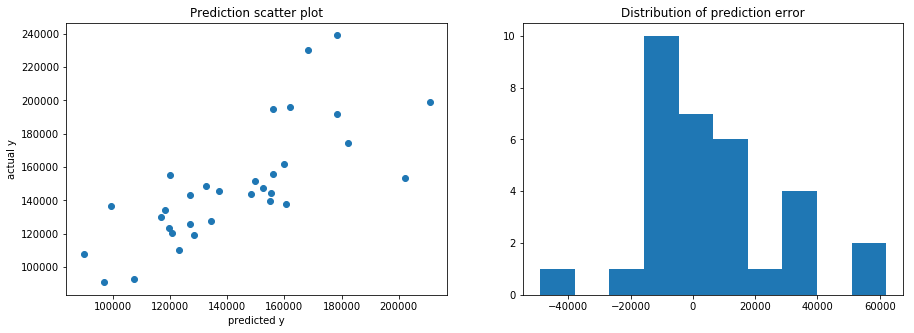

('predicted year: ', 2007, 'score: ', 0.36499043013083432)


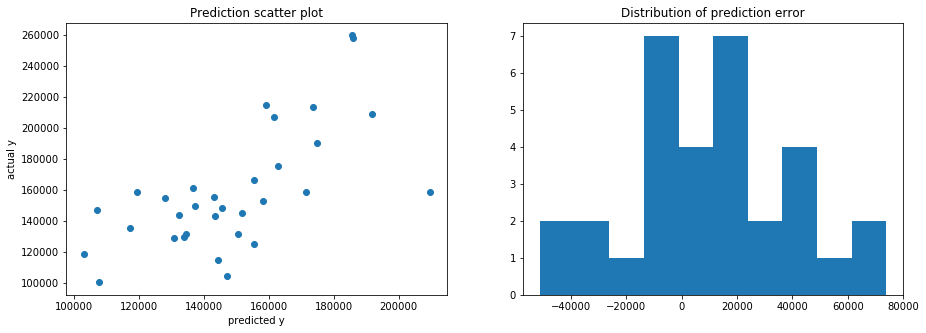

('predicted year: ', 2008, 'score: ', 0.43808997644034875)


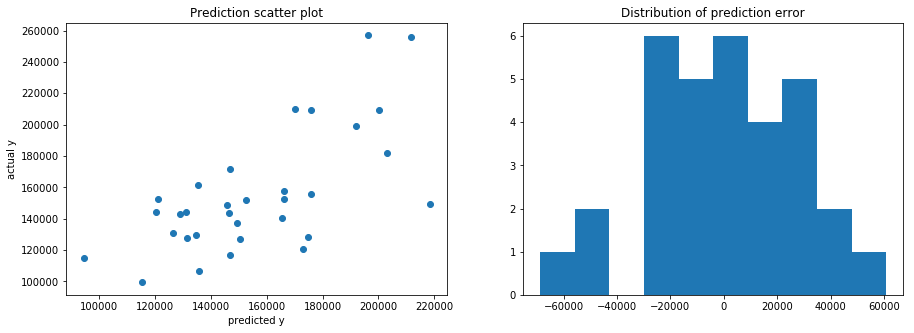

('predicted year: ', 2009, 'score: ', 0.4061646044414976)


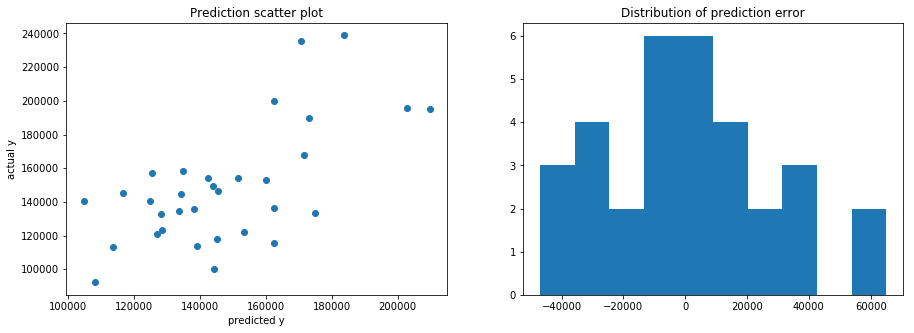

('predicted year: ', 2010, 'score: ', 0.34411500987337562)


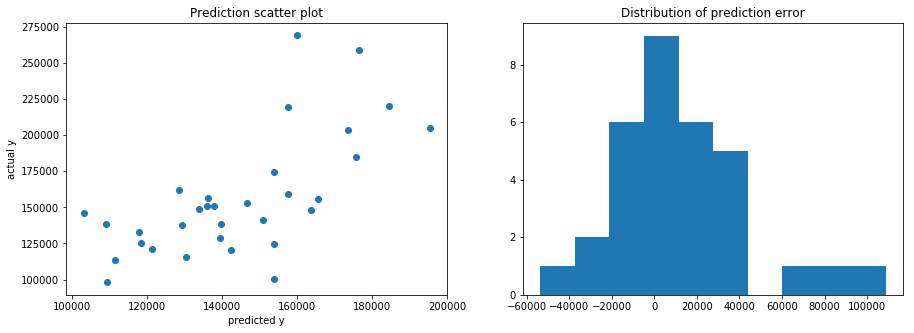

('predicted year: ', 2011, 'score: ', 0.53960419958980876)


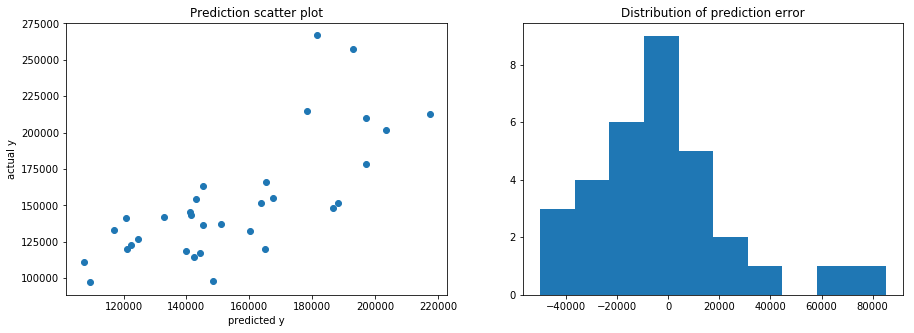

('predicted year: ', 2012, 'score: ', 0.46919129011306226)


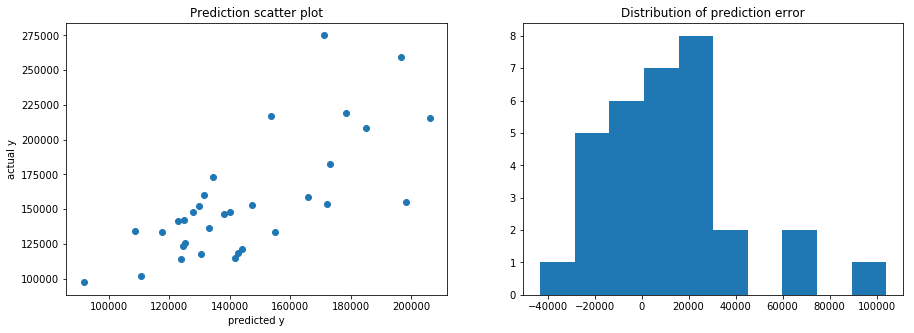

('predicted year: ', 2013, 'score: ', 0.4194880399012062)


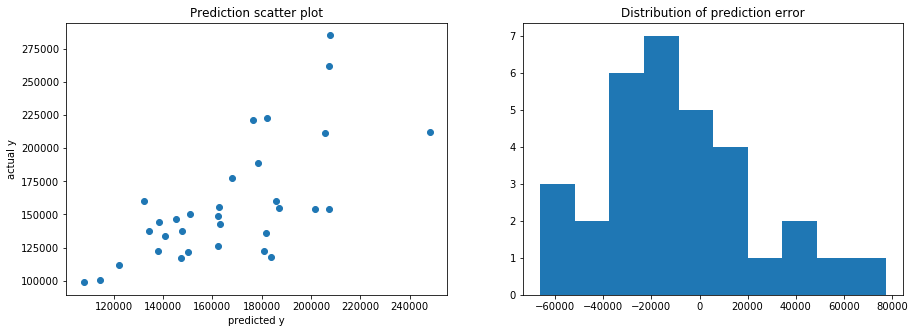

('predicted year: ', 2014, 'score: ', 0.26448893517636218)


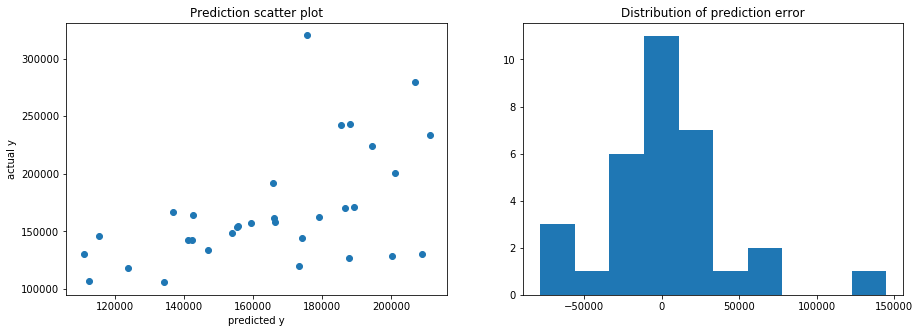

('predicted year: ', 2015, 'score: ', 0.3536051387365573)


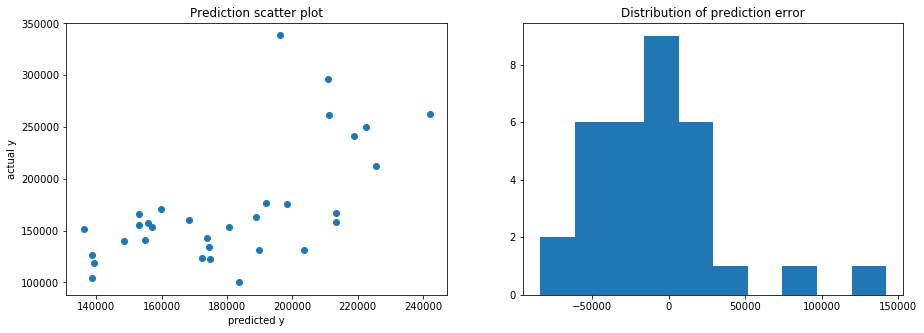

,year,score
0,2005,0.521431
1,2006,0.364990
2,2007,0.438090
3,2008,0.406165
4,2009,0.344115
5,2010,0.539604
6,2011,0.469191
7,2012,0.419488
8,2013,0.264489
9,2014,0.353605


In [494]:
"""
Fit a linear regression model for a cluster using features of year 0 to fit to prices for year 0.
Then predict prices for year 1 based on features for year 1
Repeat for all years available and obtain score
"""

select_cluster = 0
years = []
scores = []
for yr in range(2005,2015):
    lm = LinearRegression()
    x0 = X(select_cluster, yr).values
    x1 = X(select_cluster, yr+1).values
    y0 = (p(select_cluster, yr)).values
    y1 = (p(select_cluster, yr+1)).values
    lm.fit(x0, y0)
    y1_pred = lm.predict(x1)
    error = y1-y1_pred
    score = lm.score(x1, y1)
    print ('predicted year: ', yr+1, 'score: ', score)
    
    years.append(yr)
    scores.append(score)

    fig, axes = plt.subplots(1,2, figsize = (15,5))
    axs, axh = axes.flatten()
    
    axs.scatter(x= y1_pred, y=y1)
    axs.set_title('Prediction scatter plot')
    axs.set_xlabel('predicted y')
    axs.set_ylabel('actual y')

    axh.hist(error, bins = 10, histtype='bar')
    axh.set_title('Distribution of prediction error')

    plt.show()

results = pd.DataFrame(zip(years, scores))
results.columns = ['year', 'score']
results

### Log Transform of Features and Prices

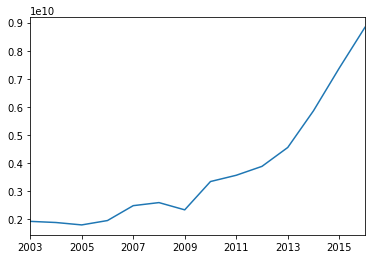

In [479]:
hp_years = houseprices.loc[:,'2003':'2016'].var(axis=0)
hp_years.plot()

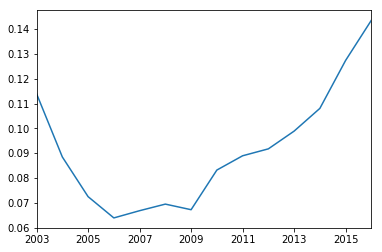

In [480]:
hp_years_log = houseprices.loc[:,'2003':'2016'].apply(lambda x: np.log(x))
hp_years_log.var(axis=0).plot()

('predicted year: ', 2006, 'score: ', 0.54102582221859463)


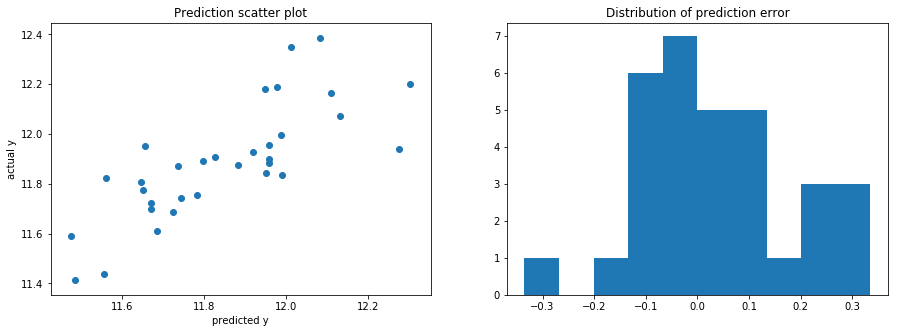

('predicted year: ', 2007, 'score: ', 0.38530315505415802)


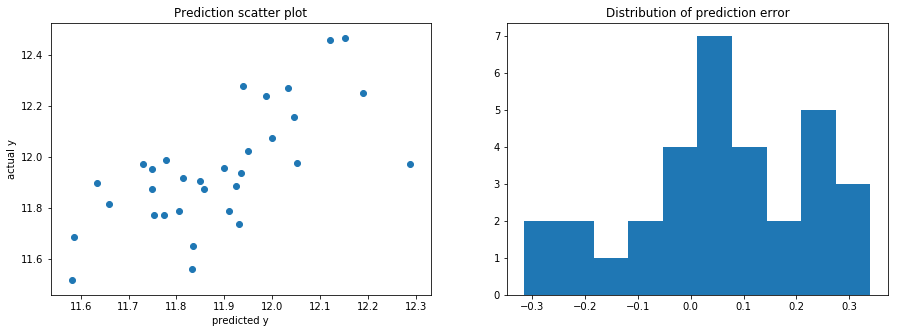

('predicted year: ', 2008, 'score: ', 0.44764184640344051)


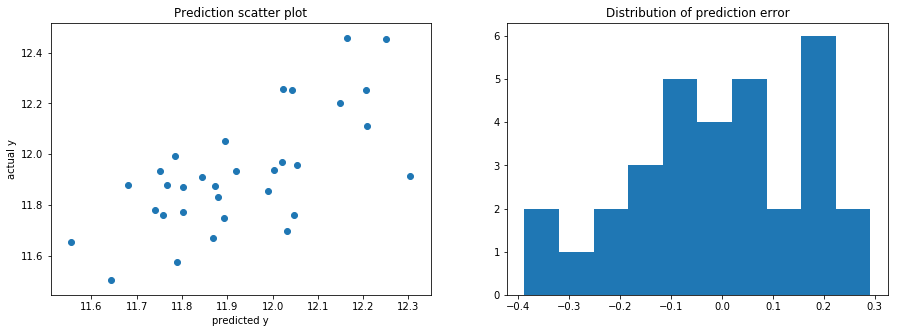

('predicted year: ', 2009, 'score: ', 0.39667608892758427)


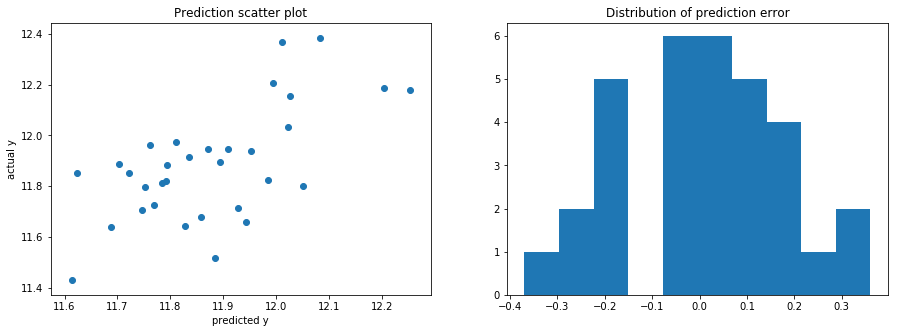

('predicted year: ', 2010, 'score: ', 0.35322323772441355)


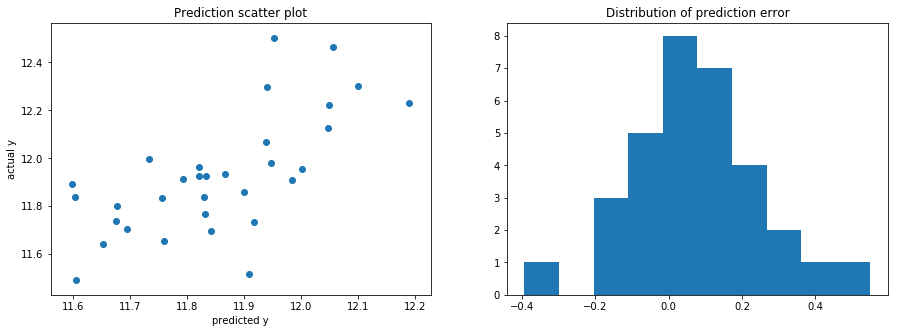

('predicted year: ', 2011, 'score: ', 0.57543446158377076)


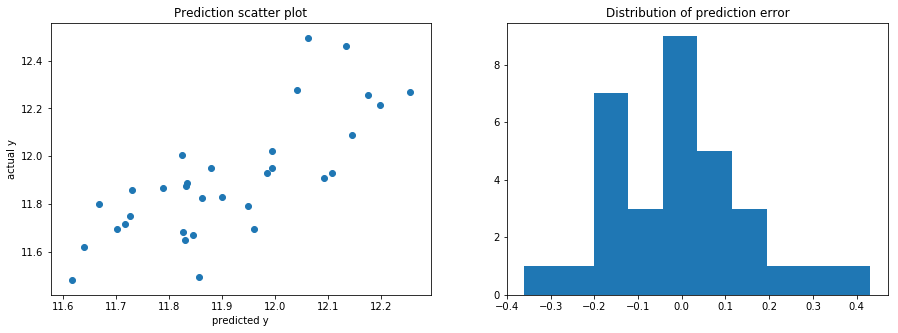

('predicted year: ', 2012, 'score: ', 0.49106975090405758)


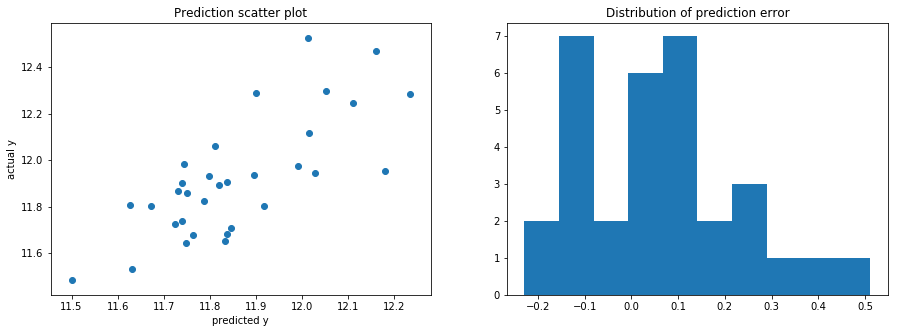

('predicted year: ', 2013, 'score: ', 0.45376941846121788)


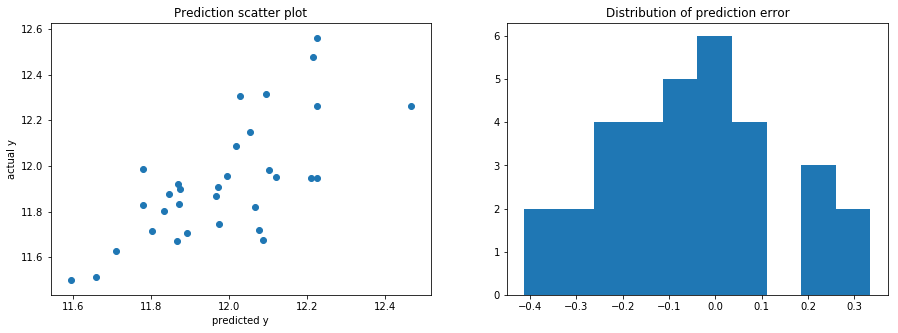

('predicted year: ', 2014, 'score: ', 0.30135356319354623)


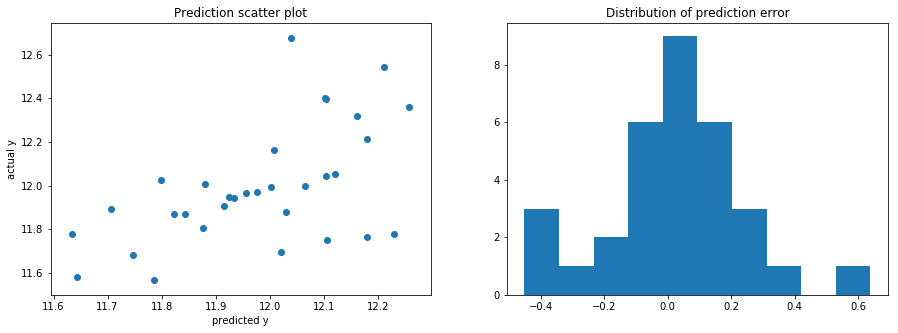

('predicted year: ', 2015, 'score: ', 0.3660799943110824)


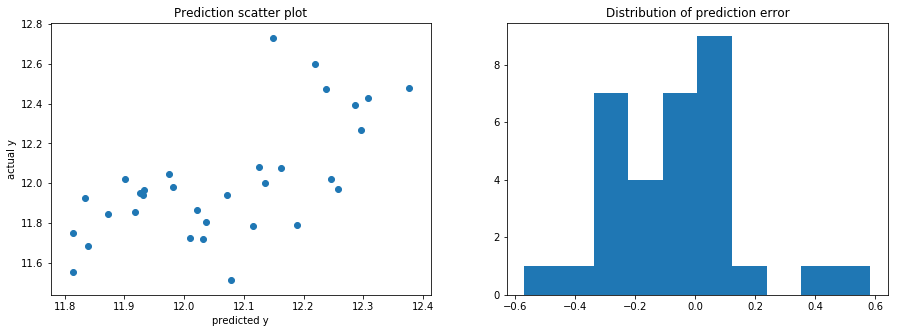

,year,score
0,2005,0.541026
1,2006,0.385303
2,2007,0.447642
3,2008,0.396676
4,2009,0.353223
5,2010,0.575434
6,2011,0.491070
7,2012,0.453769
8,2013,0.301354
9,2014,0.366080


In [495]:
# fit a linear regression model using the log transform of features and prices
select_cluster = 0
years = []
scores = []
for yr in range(2005,2015):
    lm = LinearRegression()
    x0 = X(select_cluster, yr).apply(lambda x: np.log(x)).values
    x1 = X(select_cluster, yr+1).apply(lambda x: np.log(x)).values
    y0 = (p(select_cluster, yr)).apply(lambda x: np.log(x)).values
    y1 = (p(select_cluster, yr+1)).apply(lambda x: np.log(x)).values
    lm.fit(x0, y0)
    y1_pred = lm.predict(x1)
    error = y1-y1_pred
    score = lm.score(x1, y1)
    print ('predicted year: ', yr+1, 'score: ', score)
    
    years.append(yr)
    scores.append(score)

    fig, axes = plt.subplots(1,2, figsize = (15,5))
    axs, axh = axes.flatten()
    
    axs.scatter(x= y1_pred, y=y1)
    axs.set_title('Prediction scatter plot')
    axs.set_xlabel('predicted y')
    axs.set_ylabel('actual y')

    axh.hist(error, bins = 10, histtype='bar')
    axh.set_title('Distribution of prediction error')

    plt.show()

results_log = pd.DataFrame(zip(years, scores))
results_log.columns = ['year', 'score']
results_log

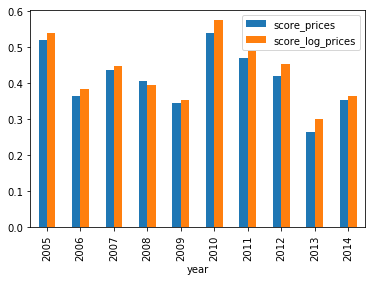

In [496]:
comp_results = results.merge(results_log, on='year', suffixes = ['_prices', '_log_prices']).set_index('year')
comp_results.plot(kind='bar')

In [497]:
comp_results['log_better'] = comp_results['score_prices'] < comp_results['score_log_prices']
comp_results

,score_prices,score_log_prices,log_better
year,,,
2005,0.521431,0.541026,True
2006,0.364990,0.385303,True
2007,0.438090,0.447642,True
2008,0.406165,0.396676,False
2009,0.344115,0.353223,True
2010,0.539604,0.575434,True
2011,0.469191,0.491070,True
2012,0.419488,0.453769,True
2013,0.264489,0.301354,True


In [498]:
float(comp_results['log_better'].sum()) / len(comp_results['log_better'])

0.9

## Fitting a Linear Regression Model based on Economic Indicators and Past Prices 

This section now introduces prior year house prices to the features matrix in order to improve the fit. A series of tests is performed in order to determine what information in the features matrix is useful in determining future house prices and construct the features matrix that provides the best overall fit. 

The test is performed for each cluster separately. The model is trained on once based one data from one to two previous years, and applied to the next year as the test data. 

### Test 1 

This test uses previous year's house prices and current year's economic indicators to fit to current year's prices:

('predicted year: ', 2007, 'score: ', 0.96508005136024311)


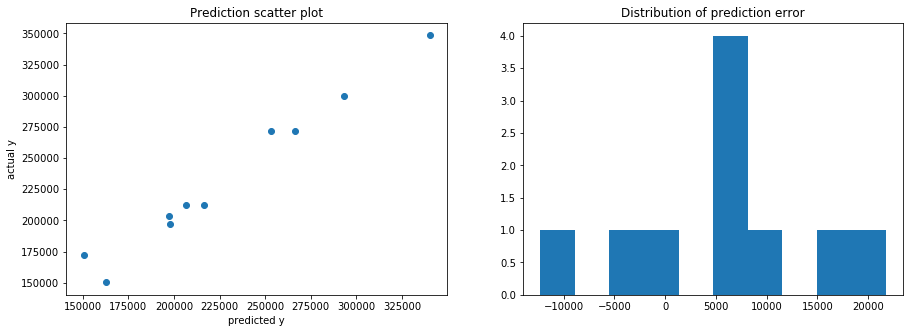

('predicted year: ', 2008, 'score: ', 0.70674065257545393)


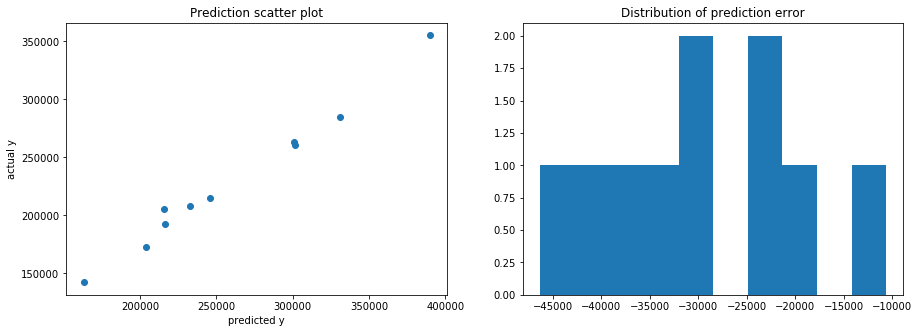

('predicted year: ', 2009, 'score: ', 0.97344024975513721)


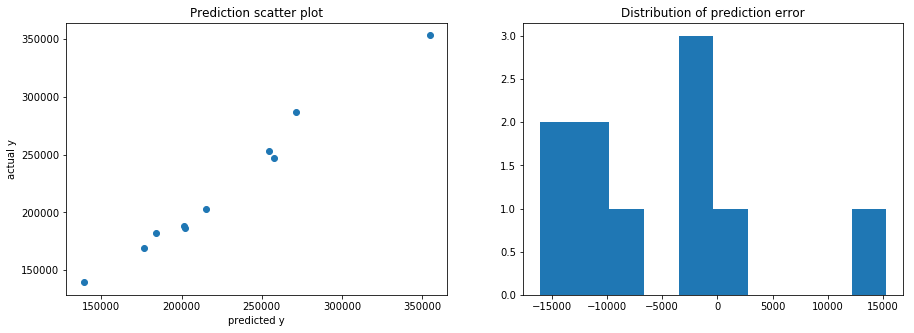

('predicted year: ', 2010, 'score: ', 0.81421439612240709)


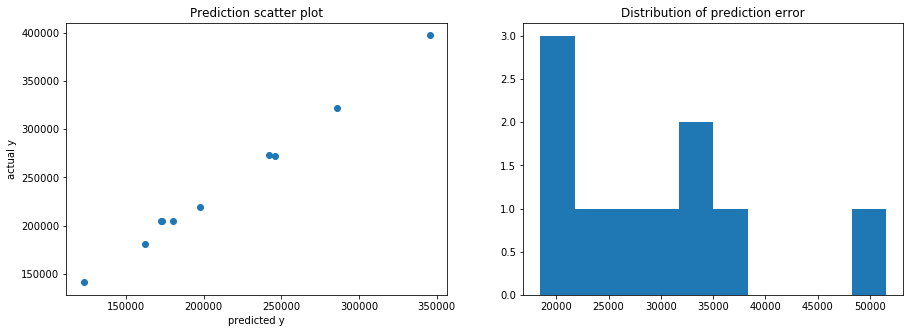

('predicted year: ', 2011, 'score: ', 0.86176478860918337)


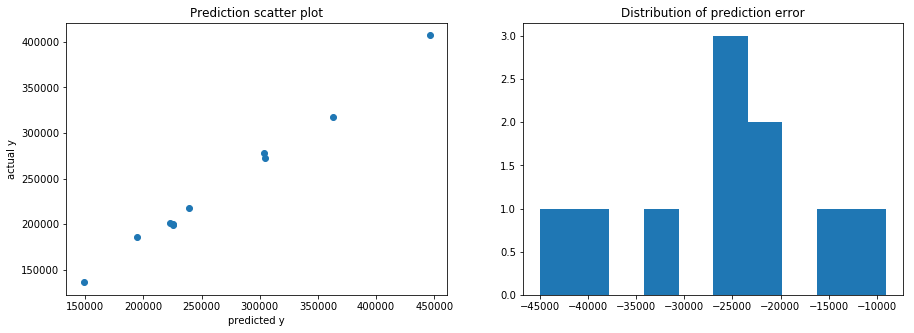

('predicted year: ', 2012, 'score: ', 0.97503923974144247)


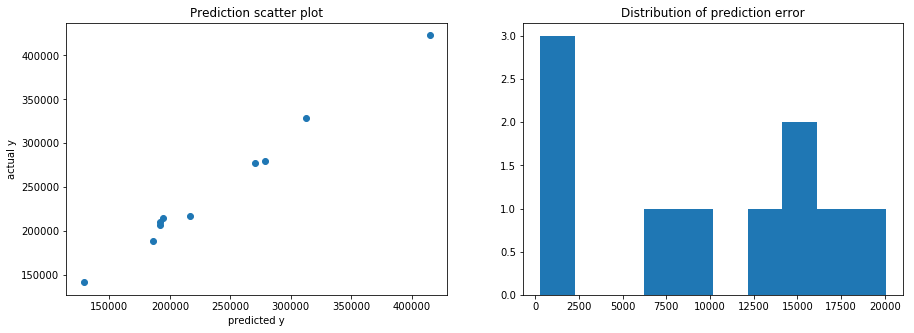

('predicted year: ', 2013, 'score: ', 0.97558131305733464)


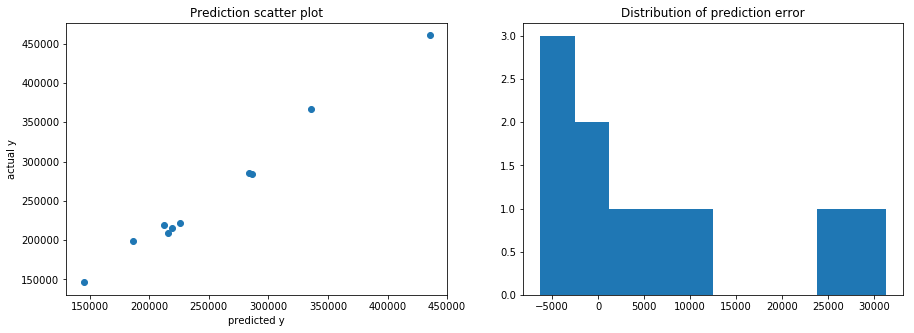

('predicted year: ', 2014, 'score: ', 0.98577350215025139)


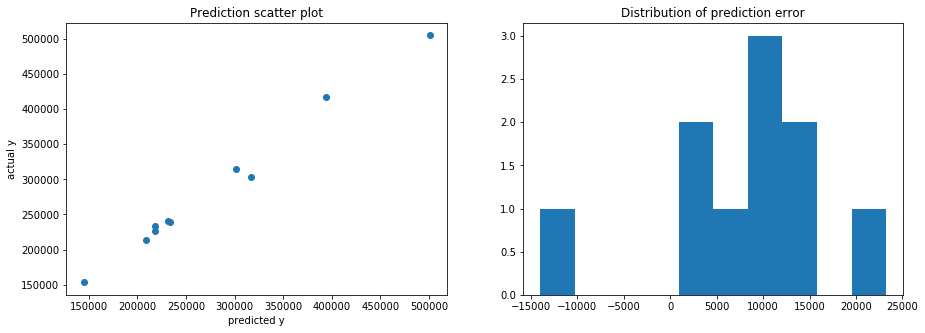

('predicted year: ', 2015, 'score: ', 0.99081924557335621)


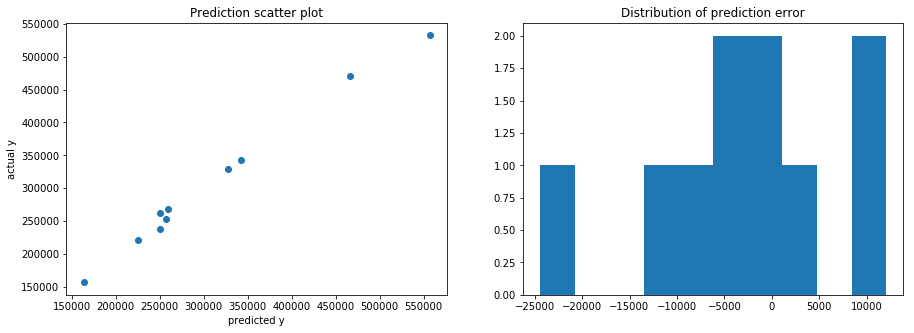

,predicted year,score
0,2007,0.965080
1,2008,0.706741
2,2009,0.973440
3,2010,0.814214
4,2011,0.861765
5,2012,0.975039
6,2013,0.975581
7,2014,0.985774
8,2015,0.990819


In [485]:
# fit a linear regression model for a cluster
select_cluster = 1
years = []
scores = []
for yr in range(2005,2014):
    lm = LinearRegression()
    x0 = pd.concat([X(select_cluster, yr+1), q(select_cluster, yr)], axis=1).values
    x1 = pd.concat([X(select_cluster, yr+2), q(select_cluster, yr+1)], axis=1).values
    #x2 = X(select_cluster, yr+2).values
    y0 = (q(select_cluster, yr+1)).values
    y1 = (q(select_cluster, yr+2)).values
    #y2 = (p(select_cluster, yr+2)).values
    lm.fit(x0, y0)
    y1_pred = lm.predict(x1)
    error = y1-y1_pred
    score = lm.score(x1, y1)
    print ('predicted year: ', yr+2, 'score: ', score)
    
    years.append(yr+2)
    scores.append(score)

    fig, axes = plt.subplots(1,2, figsize = (15,5))
    axs, axh = axes.flatten()
    
    axs.scatter(x= y1_pred, y=y1)
    axs.set_title('Prediction scatter plot')
    axs.set_xlabel('predicted y')
    axs.set_ylabel('actual y')

    axh.hist(error, bins = 10, histtype='bar')
    axh.set_title('Distribution of prediction error')

    plt.show()

results = pd.DataFrame(zip(years, scores))
results.columns = ['predicted year', 'score']
results

In [487]:
# same code without plots, to be used in the series of tests with different configurations of X
select_cluster = 2
years = []
scores = []
mean_errors = []
max_errors = []
coefficients = []

for yr in range(2005,2014):
    lm = LinearRegression()
    x0 = pd.concat([X(select_cluster, yr+1), q(select_cluster, yr)], axis=1).values
    x1 = pd.concat([X(select_cluster, yr+2), q(select_cluster, yr+1)], axis=1).values
    #x2 = X(select_cluster, yr+2).values
    y0 = (q(select_cluster, yr+1)).values
    y1 = (q(select_cluster, yr+2)).values
    #y2 = (p(select_cluster, yr+2)).values
    lm.fit(x0, y0)
    y1_pred = lm.predict(x1)
    error = y1-y1_pred
    score = lm.score(x1, y1)
    #print ('predicted year: ', yr+2, 'score: ', score)
    
    years.append(yr+2)
    scores.append(score)
    mean_errors.append(error.mean() / y1.mean())
    max_errors.append(abs(error.max()) / y1.mean())
    coefficients.append(list(lm.coef_))


results = pd.DataFrame(zip(years, scores, mean_errors, max_errors))
results.columns = ['predicted year', 'score', 'mean error / mean house price', 'max error / mean house price']
coefficients = pd.DataFrame(zip(years, coefficients))
coefficients.columns = ['year', 'coefficients']

results

,predicted year,score,mean error / mean house price,max error / mean house price
0,2007,0.980301,-0.002987,0.068662
1,2008,0.846189,-0.088748,0.030252
2,2009,0.888315,-0.022930,0.055781
3,2010,0.758903,0.102594,0.375986
4,2011,0.874433,-0.081412,0.013182
5,2012,0.989251,0.025792,0.056021
6,2013,0.996294,0.006825,0.034971
7,2014,0.975074,0.034166,0.177726
8,2015,0.961758,-0.002507,0.216255


In [488]:
print coefficients

   year                                       coefficients
0  2007  [0.0, -3987.28834045, 8.98684249097, -45.21077...
1  2008  [0.0, -19299.1005055, -12.4008148332, -21.8740...
2  2009  [0.0, -11641.9813977, -20.0755965183, -533.714...
3  2010  [0.0, -10892.000246, 11.1110600879, -210.24326...
4  2011  [0.0, 7592.35939065, 62.9304117663, 278.594106...
5  2012  [0.0, 5009.60782809, -13.412733756, -305.09231...
6  2013  [0.0, 2286.73928332, 62.8111322034, -56.683350...
7  2014  [0.0, 6497.4426543, 10.0365925933, 20.73743651...
8  2015  [0.0, 7654.80000156, 57.9841677438, 9.17923829...


### Test 2 

This test uses two prior years for economic indicators and one prior year for prices. The intention is to pick up the change in indicators:

In [489]:
select_cluster = 2
years = []
scores = []
mean_errors = []
max_errors = []
actual_change = []
max_change = []
coefficients = []

for yr in range(2005,2014):
    lm = LinearRegression()
    x0 = pd.concat([X(select_cluster, yr), X(select_cluster, yr+1), q(select_cluster, yr)], axis=1).values
    x1 = pd.concat([X(select_cluster, yr+1), X(select_cluster, yr+2), q(select_cluster, yr+1)], axis=1).values
    #x2 = X(select_cluster, yr+2).values
    y0 = (q(select_cluster, yr+1)).values
    y1 = (q(select_cluster, yr+2)).values
    #y2 = (p(select_cluster, yr+2)).values
    lm.fit(x0, y0)
    y1_pred = lm.predict(x1)
    error = y1-y1_pred
    score = lm.score(x1, y1)
    #print ('predicted year: ', yr+2, 'score: ', score)
    
    years.append(yr+2)
    scores.append(score)
    mean_errors.append(error.mean() / y1.mean())
    max_errors.append(abs(error.max()) / y1.mean())
    actual_change.append((y1/y0-1).mean())
    max_change.append((abs(y1-y0)/y1.mean()).max())
    coefficients.append(list(lm.coef_))


results1 = pd.DataFrame(zip(years, scores, mean_errors, max_errors, actual_change, max_change))
results1.columns = ['predicted year', 'score', 'mean error / mean house price', 'max error / mean house price', 'actual change', 'max change']
coefficients = pd.DataFrame(zip(years, coefficients))
coefficients.columns = ['year', 'coefficients']

results1

,predicted year,score,mean error / mean house price,max error / mean house price,actual change,max change
0,2007,0.974100,-0.003944,0.063532,0.065512,0.130372
1,2008,0.799495,-0.100744,0.018749,-0.023786,0.149969
2,2009,0.910696,-0.031643,0.017579,-0.040637,0.169831
3,2010,0.725614,0.107590,0.413221,0.060284,0.250096
4,2011,0.861889,-0.086393,0.001504,-0.018926,0.059280
5,2012,0.984292,0.034914,0.059827,0.008205,0.097731
6,2013,0.996403,-0.000973,0.026377,0.024230,0.055969
7,2014,0.977736,0.032653,0.167374,0.056314,0.232144
8,2015,0.960151,-0.002831,0.220225,0.066071,0.264884


In [490]:
coefficients

,year,coefficients
0,2007,"[0.0, 112897.984179, -18.7527247706, 478.73093..."
1,2008,"[0.0, -76561.5062993, 37.7896042974, 886.40630..."
2,2009,"[-3.58846380964e-19, -60021.7049441, 117.60994..."
3,2010,"[-6.44678567594e-10, 146760.201624, 80.1594802..."
4,2011,"[0.0, 43817.714116, -32.2044986421, 841.633471..."
5,2012,"[9.41038291117e-19, -208504.193029, 2.85436299..."
6,2013,"[-3.96934828411e-18, -172954.677246, -38.30413..."
7,2014,"[-1.47227257318e-18, -128403.458136, -2.573948..."
8,2015,"[7.55374109251e-19, 46763.3457431, 21.69573342..."


### Test 3 

This test uses only the FTSE value in the current year and previous year's house prices to predict current year house prices:

In [491]:
select_cluster = 2
years = []
scores = []
mean_errors = []
max_errors = []
actual_change = []
max_change = []
coefficients = []

for yr in range(2005,2014):
    lm = LinearRegression()
    x0 = pd.concat([X(select_cluster, yr).iloc[:,0], X(select_cluster, yr+1).iloc[:,0], q(select_cluster, yr)], axis=1).values
    x1 = pd.concat([X(select_cluster, yr+1).iloc[:,0], X(select_cluster, yr+2).iloc[:,0], q(select_cluster, yr+1)], axis=1).values
    #x2 = X(select_cluster, yr+2).values
    y0 = (q(select_cluster, yr+1)).values
    y1 = (q(select_cluster, yr+2)).values
    #y2 = (p(select_cluster, yr+2)).values
    lm.fit(x0, y0)
    y1_pred = lm.predict(x1)
    error = y1-y1_pred
    score = lm.score(x1, y1)
    #print ('predicted year: ', yr+2, 'score: ', score)
    
    years.append(yr+2)
    scores.append(score)
    mean_errors.append(error.mean() / y1.mean())
    max_errors.append(abs(error.max()) / y1.mean())
    actual_change.append((y1/y0-1).mean())
    max_change.append((abs(y1-y0)/y1.mean()).max())
    coefficients.append(list(lm.coef_))


results2 = pd.DataFrame(zip(years, scores, mean_errors, max_errors, actual_change, max_change))
results2.columns = ['predicted year', 'score', 'mean error / mean house price', 'max error / mean house price', 'actual change', 'max change']
coefficients2 = pd.DataFrame(zip(years, coefficients))
coefficients2.columns = ['year', 'coefficients']

results2

,predicted year,score,mean error / mean house price,max error / mean house price,actual change,max change
0,2007,0.979520,-0.001650,0.073397,0.065512,0.130372
1,2008,0.858550,-0.084172,0.047545,-0.023786,0.149969
2,2009,0.900002,-0.021719,0.069915,-0.040637,0.169831
3,2010,0.769438,0.100513,0.376296,0.060284,0.250096
4,2011,0.841713,-0.096179,0.016615,-0.018926,0.059280
5,2012,0.988242,0.028027,0.070294,0.008205,0.097731
6,2013,0.995099,0.012955,0.047115,0.024230,0.055969
7,2014,0.974575,0.034366,0.178228,0.056314,0.232144
8,2015,0.958817,-0.001093,0.229852,0.066071,0.264884


### Test 4 

Using only previous year's prices in the features matrix and calculating the correlation between previous year and current year.

In [492]:
select_cluster = 2
years = []
scores = []

for yr in range(2006,2015):
    lm = LinearRegression()
    x0 = q(select_cluster, yr).values
    y0 = q(select_cluster, yr+1).values
        
    score = (np.corrcoef(x0, y0)[0,1])  #score is the R_squared value
        
    years.append(yr+1)
    scores.append(score)

results3 = pd.DataFrame(zip(years, scores)) 
results3.columns = ['predicted year', 'score']
results3

,predicted year,score
0,2007,0.990388
1,2008,0.992087
2,2009,0.995291
3,2010,0.998120
4,2011,0.997543
5,2012,0.998819
6,2013,0.999157
7,2014,0.998503
8,2015,0.983104


Consuruct a data frame to compare results of teh 4 tests:

In [493]:
comp_res_res1 = results[['predicted year', 'score']].merge(results1[['predicted year', 'score']], on='predicted year')
comp_res_res2 = comp_res_res1.merge(results2[['predicted year', 'score']], on='predicted year')
comp_res_res2 = comp_res_res2.set_index('predicted year')
comp_res_res2.columns = ['test1', 'test2', 'test3']
comp_res_res2['test4'] = results3.set_index('predicted year')['score']
comp_res_res2.loc['average', :] = comp_res_res2.mean(axis=0)
comp_res_res2

,test1,test2,test3,test4
predicted year,,,,
2007,0.980301,0.974100,0.979520,0.990388
2008,0.846189,0.799495,0.858550,0.992087
2009,0.888315,0.910696,0.900002,0.995291
2010,0.758903,0.725614,0.769438,0.998120
2011,0.874433,0.861889,0.841713,0.997543
2012,0.989251,0.984292,0.988242,0.998819
2013,0.996294,0.996403,0.995099,0.999157
2014,0.975074,0.977736,0.974575,0.998503
2015,0.961758,0.960151,0.958817,0.983104
